In [1]:
import cv2
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
%matplotlib inline

/home/mrinal/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mrinal/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mrinal/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mrinal/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [ ]:
def classify():
    
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print(X_train.shape)
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
    X_train = np.array(X_train, dtype=np.float64)
    X_test = np.array(X_test, dtype=np.float64)
    X_train /= 255
    X_test /= 255
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
        activation='relu',
        input_shape=(28, 28, 1))) #image size
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax')) #number of classes
    model.compile(loss='sparse_categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy'])
    batch_size = 128
    epochs = 10
    model.fit(X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=2,
        validation_data=(X_test, y_test))
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    return model

In [ ]:
model = classify()

In [ ]:
def identify(img):
    
    img1 = img.copy()
    

In [2]:
def step(img,label):
    
    s = int(img.shape[0]/9)
    X = []
    Y = []
    for i in range(9):
        for j in range(9):
            img1 = img[s*i:s*(i+1),j*s:(j+1)*s]
            
            cur = i*9 + j
            label1 = label[cur]
            
            img1 = img1[2:,2:]
            img1 = img1[:img1.shape[0]-3,:img1.shape[1]-3]
            
#             print(np.count_nonzero(img1 == 255) / (img1.shape[0]*img1.shape[1]))
#             plt.imshow(img1,cmap='Greys_r')
#             plt.show()
            
            if np.count_nonzero(img1 == 255) / (img1.shape[0]*img1.shape[1]) > 0.95:
                label1 = -1
                
            X.append(img1)
            Y.append(label1)
    
    return X,Y

In [51]:
def trans(img):
    
    img1 = np.zeros([img.shape[0]+10,img.shape[1]+10])
    img1[5:img1.shape[0]-5,5:img1.shape[1]-5] = img
    ret, thresh = cv2.threshold(img1, 120, 255, cv2.THRESH_BINARY)
    print(thresh.shape)
    plt.imshow(thresh,cmap='Greys_r')
    plt.show()
    
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = angle + 90
        angle = -angle
    print(angle)
    M = cv2.getRotationMatrix2D((thresh.shape[0] / 2, thresh.shape[1] / 2), -angle, 1) 
    img1 = cv2.warpAffine(thresh, M, (thresh.shape[0], thresh.shape[1])) 
    ret, img1 = cv2.threshold(img1, 120, 255, cv2.THRESH_BINARY)
    
    plt.imshow(img1,cmap='Greys_r')
    plt.show()
    
    coor = np.where(img1 > 0)
    x_min = np.min(coor[0])
    y_min = np.min(coor[1])
    
    img1 = img1[x_min:,y_min:]
    img1 = img1[:img1.shape[0]-x_min,:img1.shape[1]-y_min]
    
    plt.imshow(img1,cmap='Greys_r')
    plt.show()
    
    x_left = img1.shape[0]%9
    y_left = img1.shape[1]%9
    
    img1 = img1[x_left:,y_left:]
    return img1

  0%|          | 0/5000 [00:00<?, ?it/s]

(310, 310)


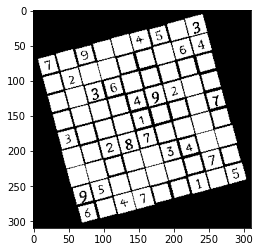

-14.995079040527344


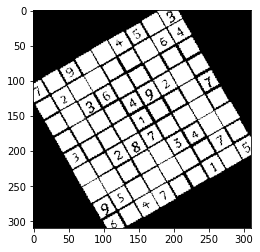

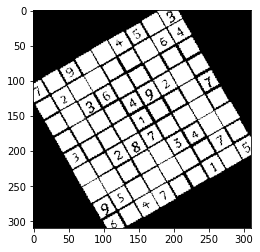

  0%|          | 1/5000 [00:00<46:56,  1.77it/s]

[7, 6, 9, 1, 8, 4, 5, 2, 3, 5, 2, 1, 9, 3, 7, 8, 6, 4, 8, 4, 3, 6, 5, 2, 7, 1, 9, 1, 7, 6, 3, 4, 9, 2, 5, 8, 3, 8, 5, 2, 1, 6, 9, 4, 7, 4, 9, 2, 8, 7, 5, 6, 3, 1, 2, 1, 7, 5, 9, 3, 4, 8, 6, 9, 5, 8, 4, 6, 1, 3, 7, 2, 6, 3, 4, 7, 2, 8, 1, 9, 5]
[7, 6, 9, 1, 8, 4, 5, 2, 3, 5, 2, 1, 9, 3, 7, 8, 6, 4, 8, 4, 3, 6, 5, 2, 7, 1, 9, 1, 7, 6, 3, 4, 9, 2, 5, 8, 3, 8, 5, 2, 1, 6, 9, 4, 7, 4, 9, 2, 8, 7, 5, 6, 3, 1, 2, 1, 7, 5, 9, 3, 4, 8, 6, 9, 5, 8, 4, 6, 1, 3, 7, 2, 6, 3, 4, 7, 2, 8, 1, 9, 5]
(310, 310)


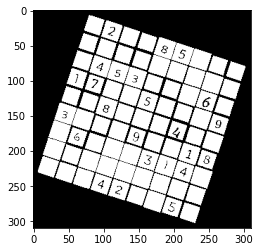

-18.083446502685547


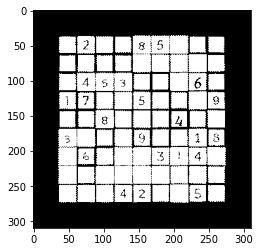

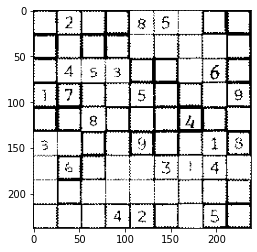

  0%|          | 2/5000 [00:01<49:45,  1.67it/s]

[7, 2, 1, 6, 8, 5, 3, 9, 4, 6, 8, 3, 9, 4, 7, 5, 2, 1, 9, 4, 5, 3, 1, 2, 8, 6, 7, 1, 7, 4, 2, 5, 8, 6, 3, 9, 2, 9, 8, 1, 3, 6, 4, 7, 5, 3, 5, 6, 7, 9, 4, 2, 1, 8, 5, 6, 9, 8, 7, 3, 1, 4, 2, 4, 1, 2, 5, 6, 9, 7, 8, 3, 8, 3, 7, 4, 2, 1, 9, 5, 6]
[7, 2, 1, 6, 8, 5, -1, 9, 4, 6, 8, 3, 9, -1, -1, 5, -1, 1, 9, 4, 5, 3, 1, 2, -1, 6, 7, 1, 7, 4, -1, 5, -1, 6, -1, 9, 2, 9, 8, -1, -1, -1, 4, -1, -1, 3, -1, 6, -1, 9, -1, -1, 1, 8, -1, 6, 9, -1, -1, 3, -1, 4, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 8, -1, -1, 4, 2, -1, -1, 5, -1]
(310, 310)


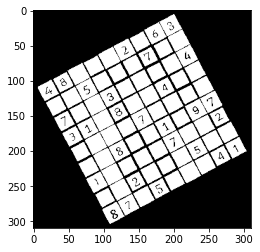

-28.009174346923828


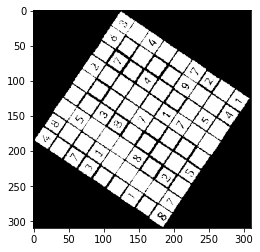

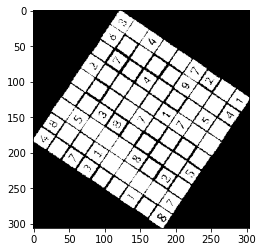

  0%|          | 3/5000 [00:01<50:04,  1.66it/s]

[4, 8, 9, 7, 5, 2, 1, 6, 3, 2, 3, 5, 6, 1, 4, 7, 8, 9, 7, 6, 1, 3, 9, 8, 2, 5, 4, 3, 1, 7, 8, 6, 9, 4, 2, 5, 6, 9, 4, 2, 7, 5, 3, 1, 8, 5, 2, 8, 4, 3, 1, 6, 9, 7, 1, 5, 6, 9, 4, 7, 8, 3, 2, 9, 4, 2, 1, 8, 3, 5, 7, 6, 8, 7, 3, 5, 2, 6, 9, 4, 1]
[4, 8, 9, 7, 5, 2, 1, 6, 3, 2, 3, 5, 6, 1, 4, 7, 8, 9, 7, 6, 1, 3, 9, 8, 2, 5, 4, 3, 1, 7, 8, 6, 9, 4, 2, 5, 6, 9, 4, 2, 7, 5, 3, 1, 8, 5, 2, 8, 4, 3, 1, 6, 9, 7, 1, 5, 6, 9, 4, 7, 8, 3, 2, 9, 4, 2, 1, 8, 3, 5, 7, 6, 8, 7, 3, 5, 2, 6, 9, 4, 1]
(310, 310)


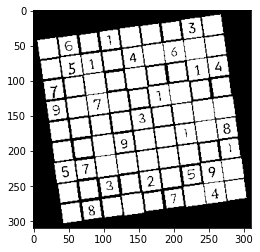

-7.989326477050781


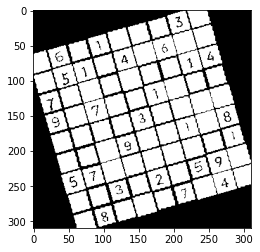

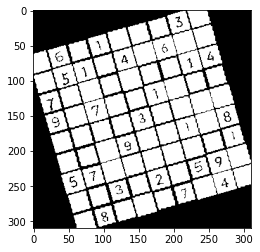

  0%|          | 4/5000 [00:02<48:47,  1.71it/s]

[2, 6, 4, 1, 8, 9, 7, 3, 5, 3, 5, 1, 7, 4, 2, 6, 8, 9, 7, 9, 8, 3, 5, 6, 2, 1, 4, 9, 2, 7, 8, 6, 1, 4, 5, 3, 8, 1, 5, 2, 3, 4, 9, 7, 6, 4, 3, 6, 9, 7, 5, 1, 2, 8, 5, 7, 2, 4, 9, 3, 8, 6, 1, 1, 4, 3, 6, 2, 8, 5, 9, 7, 6, 8, 9, 5, 1, 7, 3, 4, 2]
[2, 6, 4, 1, 8, 9, 7, 3, 5, 3, 5, 1, 7, 4, 2, 6, 8, 9, 7, 9, 8, 3, 5, 6, 2, 1, 4, 9, 2, 7, 8, 6, 1, 4, 5, 3, 8, 1, 5, 2, 3, 4, 9, 7, 6, 4, 3, 6, 9, 7, 5, 1, 2, 8, 5, 7, 2, 4, 9, 3, 8, 6, 1, 1, 4, 3, 6, 2, 8, 5, 9, 7, 6, 8, 9, 5, 1, 7, 3, 4, 2]
(310, 310)


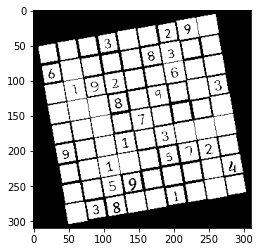

-9.981826782226562


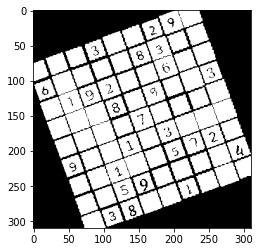

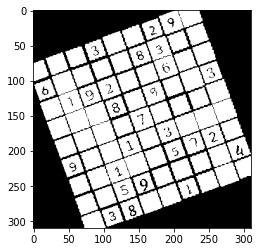

  0%|          | 5/5000 [00:03<52:37,  1.58it/s]

[8, 7, 4, 3, 1, 6, 2, 9, 5, 6, 5, 2, 7, 9, 8, 3, 4, 1, 3, 1, 9, 2, 5, 4, 6, 8, 7, 5, 2, 7, 8, 6, 9, 4, 1, 3, 1, 4, 3, 5, 7, 2, 8, 6, 9, 9, 8, 6, 1, 4, 3, 5, 7, 2, 4, 9, 1, 6, 3, 5, 7, 2, 8, 2, 6, 5, 9, 8, 7, 1, 3, 4, 7, 3, 8, 4, 2, 1, 9, 5, 6]
[8, 7, 4, 3, 1, 6, 2, 9, 5, 6, 5, 2, 7, 9, 8, 3, 4, 1, 3, 1, 9, 2, 5, 4, 6, 8, 7, 5, 2, 7, 8, 6, 9, 4, 1, 3, 1, 4, 3, 5, 7, 2, 8, 6, 9, 9, 8, 6, 1, 4, 3, 5, 7, 2, 4, 9, 1, 6, 3, 5, 7, 2, 8, 2, 6, 5, 9, 8, 7, 1, 3, 4, 7, 3, 8, 4, 2, 1, 9, 5, 6]
(310, 310)


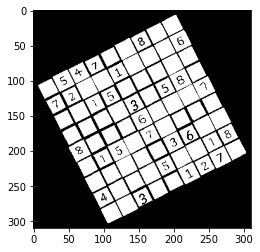

-27.00408935546875


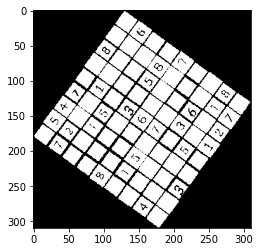

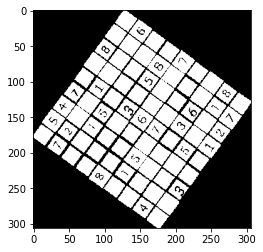

  0%|          | 6/5000 [00:03<51:38,  1.61it/s]

[9, 5, 4, 7, 2, 6, 8, 3, 1, 7, 2, 8, 3, 1, 4, 9, 5, 6, 3, 6, 1, 5, 8, 9, 7, 4, 2, 6, 4, 7, 1, 3, 2, 5, 8, 9, 8, 3, 9, 4, 6, 5, 1, 2, 7, 2, 1, 5, 9, 7, 8, 4, 6, 3, 1, 7, 2, 8, 4, 3, 6, 9, 5, 4, 9, 6, 2, 5, 7, 3, 1, 8, 5, 8, 3, 6, 9, 1, 2, 7, 4]
[9, 5, 4, 7, 2, 6, 8, 3, 1, 7, 2, 8, 3, 1, 4, 9, 5, 6, 3, 6, 1, 5, 8, 9, 7, 4, 2, 6, 4, 7, 1, 3, 2, 5, 8, 9, 8, 3, 9, 4, 6, 5, 1, 2, 7, 2, 1, 5, 9, 7, 8, 4, 6, 3, 1, 7, 2, 8, 4, 3, 6, 9, 5, 4, 9, 6, 2, 5, 7, 3, 1, 8, 5, 8, 3, 6, 9, 1, 2, 7, 4]
(310, 310)


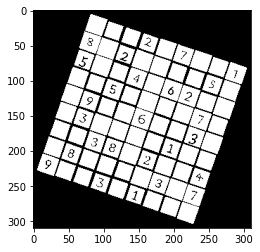

-18.996654510498047


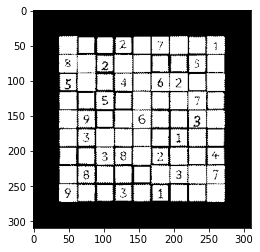

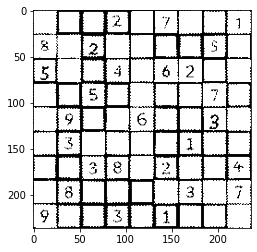

  0%|          | 7/5000 [00:04<50:20,  1.65it/s]

[3, 6, 9, 2, 5, 7, 4, 8, 1, 8, 4, 2, 9, 1, 3, 7, 5, 6, 5, 1, 7, 4, 8, 6, 2, 9, 3, 4, 2, 5, 1, 3, 8, 6, 7, 9, 7, 9, 1, 5, 6, 4, 8, 3, 2, 6, 3, 8, 7, 2, 9, 1, 4, 5, 1, 5, 3, 8, 7, 2, 9, 6, 4, 2, 8, 4, 6, 9, 5, 3, 1, 7, 9, 7, 6, 3, 4, 1, 5, 2, 8]
[-1, 6, 9, 2, -1, -1, -1, -1, -1, 8, -1, 2, -1, -1, -1, -1, -1, -1, 5, -1, -1, 4, -1, 6, 2, -1, -1, -1, 2, 5, -1, -1, -1, -1, -1, -1, -1, 9, -1, -1, 6, -1, -1, 3, -1, -1, 3, -1, -1, -1, -1, 1, -1, -1, -1, -1, 3, 8, -1, 2, -1, -1, 4, -1, 8, -1, -1, -1, -1, 3, -1, 7, 9, -1, -1, 3, -1, 1, -1, -1, -1]
(310, 310)


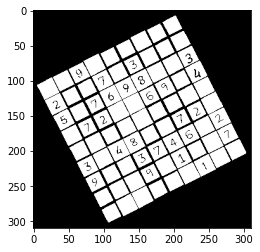

-27.004085540771484


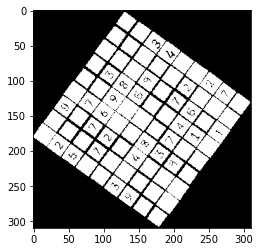

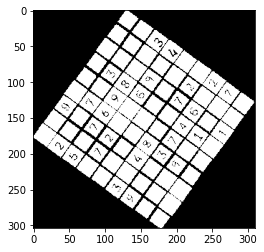

  0%|          | 8/5000 [00:04<50:06,  1.66it/s]

[4, 3, 9, 1, 5, 2, 8, 7, 6, 2, 8, 6, 7, 4, 3, 5, 9, 1, 5, 1, 7, 6, 9, 8, 2, 4, 3, 8, 7, 2, 5, 3, 6, 9, 1, 4, 1, 9, 5, 4, 2, 7, 3, 6, 8, 3, 6, 4, 8, 1, 9, 7, 2, 5, 9, 5, 1, 3, 7, 4, 6, 8, 2, 6, 2, 3, 9, 8, 1, 4, 5, 7, 7, 4, 8, 2, 6, 5, 1, 3, 9]
[4, 3, 9, 1, 5, 2, 8, 7, 6, 2, 8, 6, 7, 4, 3, 5, 9, 1, 5, 1, 7, 6, 9, 8, 2, 4, 3, 8, 7, 2, 5, 3, 6, 9, 1, 4, 1, 9, 5, 4, 2, 7, 3, 6, 8, 3, 6, 4, 8, 1, 9, 7, 2, 5, 9, 5, 1, 3, 7, 4, 6, 8, 2, 6, 2, 3, 9, 8, 1, 4, 5, 7, 7, 4, 8, 2, 6, 5, 1, 3, 9]
(310, 310)


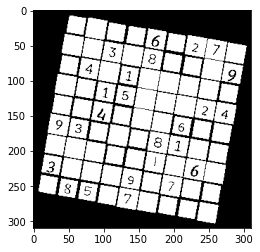

-10.007980346679688


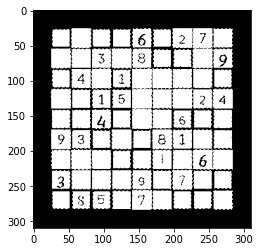

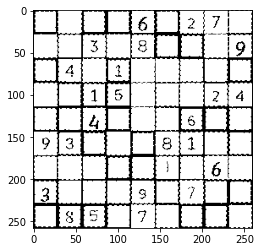

  0%|          | 9/5000 [00:05<49:20,  1.69it/s]

[1, 5, 8, 9, 6, 4, 2, 7, 3, 6, 2, 3, 7, 8, 5, 4, 1, 9, 7, 4, 9, 1, 2, 3, 5, 8, 6, 8, 6, 1, 5, 3, 7, 9, 2, 4, 5, 7, 4, 2, 1, 9, 6, 3, 8, 9, 3, 2, 6, 4, 8, 1, 5, 7, 4, 9, 7, 3, 5, 1, 8, 6, 2, 3, 1, 6, 8, 9, 2, 7, 4, 5, 2, 8, 5, 4, 7, 6, 3, 9, 1]
[1, 5, 8, 9, 6, 4, 2, 7, 3, 6, 2, 3, 7, 8, 5, 4, 1, 9, 7, 4, 9, 1, 2, 3, 5, 8, 6, 8, 6, 1, 5, 3, 7, -1, 2, 4, 5, 7, 4, 2, 1, 9, 6, 3, 8, 9, 3, 2, 6, 4, 8, 1, -1, -1, 4, 9, 7, 3, 5, 1, -1, 6, -1, 3, 1, 6, 8, 9, 2, -1, -1, -1, 2, 8, 5, 4, 7, -1, 3, -1, -1]
(310, 310)


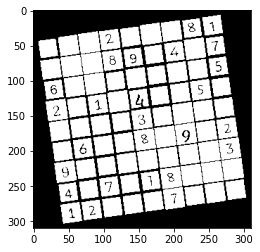

-8.01708984375


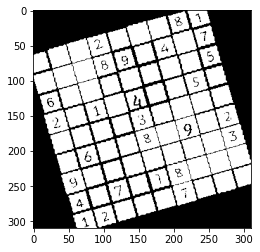

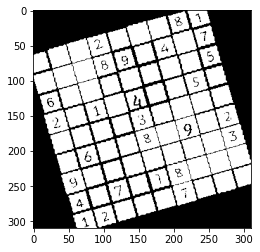

  0%|          | 10/5000 [00:05<48:11,  1.73it/s]

[7, 9, 3, 2, 5, 4, 6, 8, 1, 5, 1, 2, 8, 9, 6, 4, 3, 7, 6, 4, 8, 1, 7, 3, 2, 9, 5, 2, 7, 1, 6, 4, 9, 3, 5, 8, 8, 5, 9, 7, 3, 2, 1, 6, 4, 3, 6, 4, 5, 8, 1, 9, 7, 2, 9, 8, 6, 4, 2, 5, 7, 1, 3, 4, 3, 7, 9, 1, 8, 5, 2, 6, 1, 2, 5, 3, 6, 7, 8, 4, 9]
[7, 9, 3, 2, 5, 4, 6, 8, 1, 5, 1, 2, 8, 9, 6, 4, 3, 7, 6, 4, 8, 1, 7, 3, 2, 9, 5, 2, 7, 1, 6, 4, 9, 3, 5, 8, 8, 5, 9, 7, 3, 2, 1, 6, 4, 3, 6, 4, 5, 8, 1, 9, 7, 2, 9, 8, 6, 4, 2, 5, 7, 1, 3, 4, 3, 7, 9, 1, 8, 5, 2, 6, 1, 2, 5, 3, 6, 7, 8, 4, 9]
(310, 310)


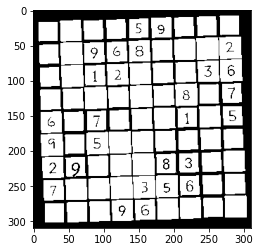

-1.7462844848632812


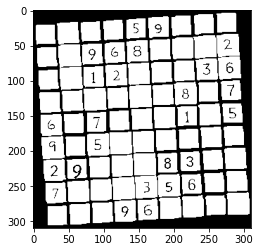

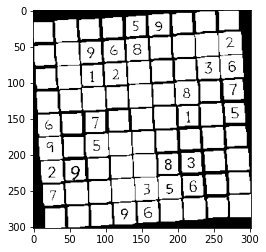

  0%|          | 11/5000 [00:06<48:20,  1.72it/s]

[3, 6, 2, 1, 5, 9, 4, 7, 8, 4, 7, 9, 6, 8, 3, 5, 1, 2, 8, 5, 1, 2, 4, 7, 9, 3, 6, 1, 2, 3, 5, 9, 6, 8, 4, 7, 6, 8, 7, 3, 2, 4, 1, 9, 5, 9, 4, 5, 8, 7, 1, 2, 6, 3, 2, 9, 6, 7, 1, 8, 3, 5, 4, 7, 1, 8, 4, 3, 5, 6, 2, 9, 5, 3, 4, 9, 6, 2, 7, 8, 1]
[3, 6, 2, 1, 5, 9, 4, 7, 8, 4, 7, 9, 6, 8, 3, 5, 1, 2, 8, 5, 1, 2, 4, 7, 9, 3, 6, 1, 2, 3, 5, 9, 6, 8, 4, 7, 6, 8, 7, 3, 2, 4, 1, 9, 5, 9, 4, 5, -1, 7, 1, 2, 6, 3, 2, 9, 6, 7, 1, 8, 3, 5, 4, 7, 1, 8, 4, 3, 5, 6, 2, 9, 5, 3, 4, 9, 6, 2, 7, 8, 1]
(310, 310)


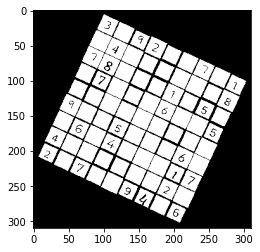

-24.9689884185791


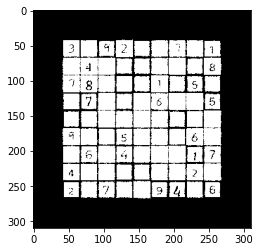

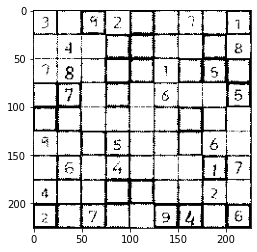

  0%|          | 12/5000 [00:07<50:27,  1.65it/s]

[3, 5, 9, 2, 6, 8, 7, 4, 1, 1, 4, 2, 7, 3, 5, 6, 9, 8, 7, 8, 6, 9, 4, 1, 3, 5, 2, 8, 7, 4, 1, 9, 6, 2, 3, 5, 6, 3, 5, 8, 2, 4, 1, 7, 9, 9, 2, 1, 5, 7, 3, 8, 6, 4, 5, 6, 3, 4, 8, 2, 9, 1, 7, 4, 9, 8, 6, 1, 7, 5, 2, 3, 2, 1, 7, 3, 5, 9, 4, 8, 6]
[3, -1, 9, 2, -1, -1, -1, -1, -1, -1, 4, -1, -1, -1, -1, -1, -1, 8, -1, 8, -1, -1, -1, -1, -1, 5, -1, -1, 7, -1, -1, -1, 6, -1, -1, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, 9, -1, -1, 5, -1, -1, -1, 6, -1, -1, 6, -1, 4, -1, -1, -1, 1, 7, 4, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1, 7, -1, -1, 9, 4, -1, 6]
(310, 310)


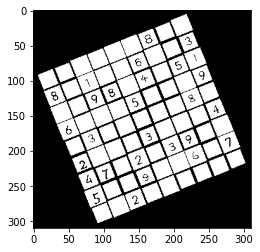

-22.004104614257812


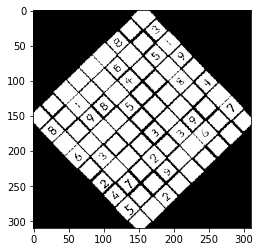

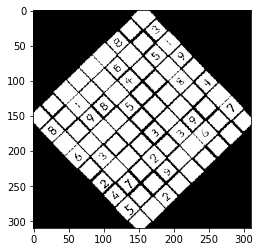

  0%|          | 13/5000 [00:07<51:53,  1.60it/s]

[7, 5, 4, 3, 1, 9, 8, 6, 2, 8, 2, 1, 5, 7, 6, 4, 9, 3, 3, 6, 9, 8, 2, 4, 7, 5, 1, 6, 4, 8, 1, 5, 7, 2, 3, 9, 1, 3, 7, 4, 9, 2, 5, 8, 6, 2, 9, 5, 6, 3, 8, 1, 7, 4, 4, 7, 6, 2, 8, 3, 9, 1, 5, 5, 8, 3, 9, 4, 1, 6, 2, 7, 9, 1, 2, 7, 6, 5, 3, 4, 8]
[7, 5, 4, 3, 1, 9, 8, 6, 2, 8, 2, 1, 5, 7, 6, 4, 9, 3, 3, 6, 9, 8, 2, 4, 7, 5, 1, 6, 4, 8, 1, 5, 7, 2, 3, 9, 1, 3, 7, 4, 9, 2, 5, 8, 6, 2, 9, 5, 6, 3, 8, 1, 7, 4, 4, 7, 6, 2, 8, 3, 9, 1, 5, 5, 8, 3, 9, 4, 1, 6, 2, 7, 9, 1, 2, 7, 6, 5, 3, 4, 8]
(310, 310)


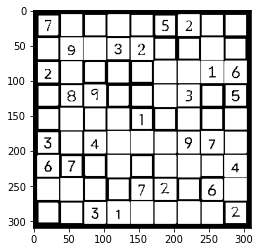

-0.0


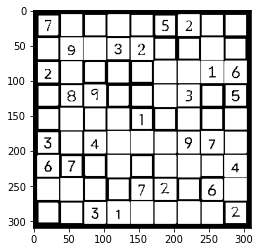

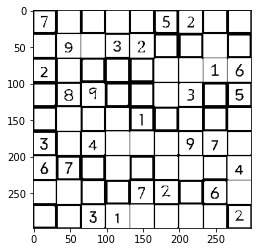

  0%|          | 14/5000 [00:08<50:20,  1.65it/s]

[7, 4, 1, 8, 6, 5, 2, 3, 9, 8, 9, 6, 3, 2, 1, 4, 5, 7, 2, 3, 5, 7, 9, 4, 8, 1, 6, 1, 8, 9, 6, 4, 7, 3, 2, 5, 5, 2, 7, 9, 1, 3, 6, 4, 8, 3, 6, 4, 2, 5, 8, 9, 7, 1, 6, 7, 2, 5, 3, 9, 1, 8, 4, 9, 1, 8, 4, 7, 2, 5, 6, 3, 4, 5, 3, 1, 8, 6, 7, 9, 2]
[7, -1, -1, -1, -1, 5, 2, -1, 9, -1, 9, -1, 3, 2, -1, 4, -1, 7, 2, -1, 5, -1, -1, -1, -1, 1, 6, -1, 8, 9, -1, -1, -1, 3, -1, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, 3, -1, 4, -1, -1, -1, 9, 7, -1, 6, 7, 2, -1, -1, -1, -1, -1, 4, -1, -1, -1, -1, 7, 2, 5, 6, -1, 4, -1, 3, -1, -1, -1, -1, -1, 2]
(310, 310)


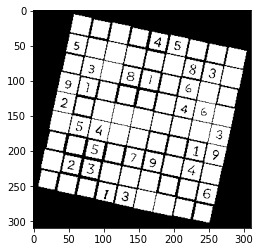

-11.987512588500977


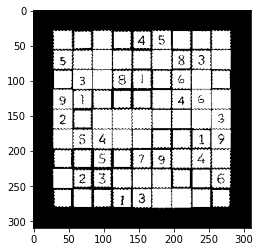

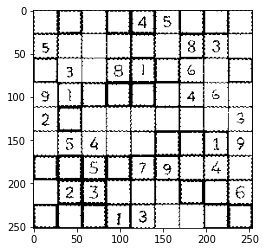

  0%|          | 15/5000 [00:09<50:05,  1.66it/s]

[8, 9, 6, 3, 4, 5, 1, 2, 7, 5, 7, 1, 9, 6, 2, 8, 3, 4, 4, 3, 2, 8, 1, 7, 6, 9, 5, 9, 1, 8, 7, 5, 3, 4, 6, 2, 2, 6, 7, 4, 9, 1, 5, 8, 3, 3, 5, 4, 6, 2, 8, 7, 1, 9, 6, 8, 5, 2, 7, 9, 3, 4, 1, 1, 2, 3, 5, 8, 4, 9, 7, 6, 7, 4, 9, 1, 3, 6, 2, 5, 8]
[-1, -1, -1, -1, 4, 5, -1, -1, -1, 5, -1, -1, -1, -1, -1, 8, 3, -1, -1, 3, -1, 8, -1, -1, 6, -1, -1, 9, -1, -1, -1, -1, -1, 4, 6, -1, 2, -1, -1, -1, -1, -1, -1, -1, 3, -1, 5, 4, -1, -1, -1, -1, 1, 9, 6, 8, 5, -1, -1, 9, -1, 4, -1, -1, 2, 3, -1, -1, -1, -1, -1, 6, 7, -1, 9, 1, 3, -1, -1, -1, -1]
(310, 310)


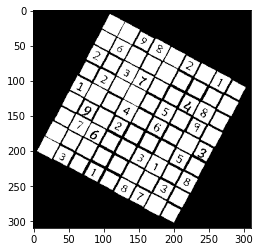

-28.024499893188477


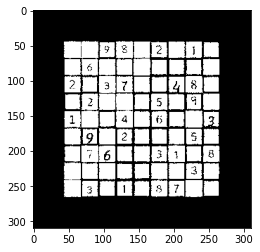

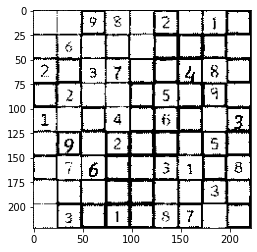

  0%|          | 16/5000 [00:09<48:08,  1.73it/s]

[7, 4, 9, 8, 6, 2, 3, 1, 5, 8, 6, 1, 5, 3, 4, 9, 2, 7, 2, 5, 3, 7, 1, 9, 4, 8, 6, 6, 2, 4, 3, 7, 5, 8, 9, 1, 1, 8, 5, 4, 9, 6, 2, 7, 3, 3, 9, 7, 2, 8, 1, 6, 5, 4, 5, 7, 6, 9, 2, 3, 1, 4, 8, 9, 1, 8, 6, 4, 7, 5, 3, 2, 4, 3, 2, 1, 5, 8, 7, 6, 9]
[7, 4, 9, 8, 6, 2, 3, 1, 5, 8, 6, 1, 5, 3, 4, 9, 2, 7, 2, 5, 3, 7, 1, 9, 4, 8, 6, 6, 2, 4, 3, 7, 5, 8, 9, 1, 1, 8, 5, 4, 9, 6, 2, -1, 3, 3, 9, 7, 2, 8, 1, -1, 5, 4, 5, 7, 6, 9, 2, 3, 1, -1, 8, 9, 1, 8, 6, 4, -1, -1, 3, -1, 4, 3, 2, 1, 5, 8, 7, -1, -1]
(310, 310)


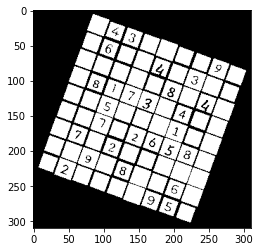

-19.98310661315918


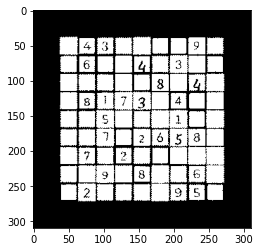

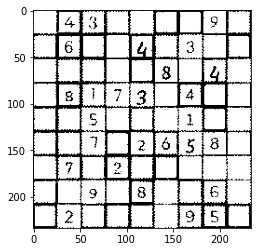

  0%|          | 17/5000 [00:10<46:53,  1.77it/s]

[7, 4, 3, 5, 1, 2, 6, 9, 8, 5, 6, 8, 9, 4, 7, 3, 1, 2, 9, 1, 2, 3, 6, 8, 7, 4, 5, 6, 8, 1, 7, 3, 5, 4, 2, 9, 2, 3, 5, 8, 9, 4, 1, 7, 6, 4, 9, 7, 1, 2, 6, 5, 8, 3, 1, 7, 6, 2, 5, 9, 8, 3, 4, 3, 5, 9, 4, 8, 1, 2, 6, 7, 8, 2, 4, 6, 7, 3, 9, 5, 1]
[-1, 4, 3, -1, -1, -1, -1, 9, -1, -1, 6, -1, -1, 4, -1, 3, -1, -1, -1, -1, -1, -1, -1, 8, -1, 4, -1, -1, 8, -1, 7, 3, -1, 4, -1, -1, -1, -1, 5, -1, -1, -1, 1, -1, -1, -1, -1, 7, -1, 2, 6, 5, 8, -1, -1, 7, -1, 2, -1, -1, -1, -1, -1, -1, -1, 9, -1, 8, -1, -1, 6, -1, -1, 2, -1, -1, -1, -1, 9, 5, -1]
(310, 310)


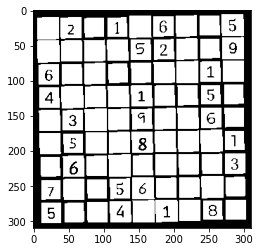

-0.8746795654296875


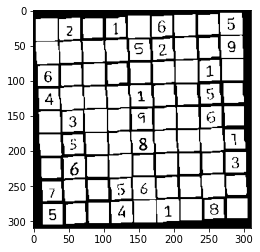

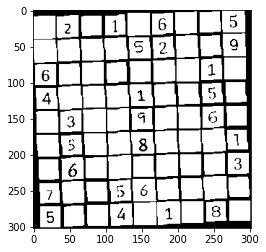

  0%|          | 18/5000 [00:10<46:18,  1.79it/s]

[8, 2, 9, 1, 7, 6, 4, 3, 5, 3, 1, 4, 8, 5, 2, 6, 7, 9, 6, 7, 5, 3, 4, 9, 2, 1, 8, 4, 8, 6, 2, 1, 3, 9, 5, 7, 2, 3, 1, 7, 9, 5, 8, 6, 4, 9, 5, 7, 6, 8, 4, 3, 2, 1, 1, 6, 8, 9, 2, 7, 5, 4, 3, 7, 4, 3, 5, 6, 8, 1, 9, 2, 5, 9, 2, 4, 3, 1, 7, 8, 6]
[8, 2, 9, 1, 7, 6, 4, 3, 5, 3, 1, 4, 8, 5, 2, 6, 7, 9, 6, 7, 5, 3, 4, 9, 2, 1, 8, 4, -1, 6, 2, 1, 3, 9, 5, 7, -1, 3, -1, 7, 9, 5, 8, 6, 4, -1, 5, -1, -1, 8, 4, 3, 2, 1, 1, 6, -1, -1, 2, 7, 5, 4, 3, 7, -1, 3, 5, 6, 8, 1, 9, 2, 5, 9, 2, 4, 3, 1, 7, 8, 6]
(310, 310)


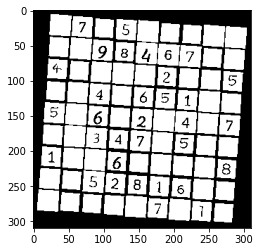

-4.000185489654541


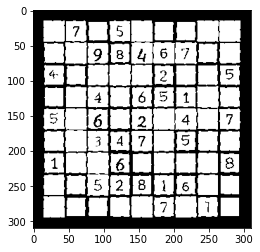

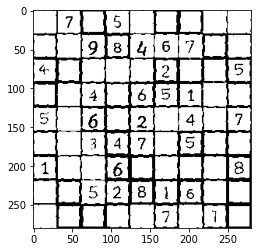

  0%|          | 19/5000 [00:11<47:41,  1.74it/s]

[8, 7, 2, 5, 1, 9, 3, 4, 6, 3, 5, 9, 8, 4, 6, 7, 2, 1, 4, 6, 1, 7, 3, 2, 8, 9, 5, 7, 8, 4, 9, 6, 5, 1, 3, 2, 5, 9, 6, 1, 2, 3, 4, 8, 7, 2, 1, 3, 4, 7, 8, 5, 6, 9, 1, 3, 7, 6, 9, 4, 2, 5, 8, 9, 4, 5, 2, 8, 1, 6, 7, 3, 6, 2, 8, 3, 5, 7, 9, 1, 4]
[-1, 7, 2, 5, -1, -1, 3, -1, -1, -1, -1, 9, 8, 4, 6, 7, 2, -1, 4, -1, -1, -1, -1, 2, -1, -1, 5, -1, -1, 4, -1, 6, 5, 1, -1, -1, 5, -1, 6, -1, 2, -1, 4, -1, 7, -1, -1, 3, 4, 7, -1, 5, -1, -1, 1, -1, -1, 6, -1, -1, -1, -1, 8, -1, 4, 5, 2, 8, 1, 6, -1, 3, -1, 2, 8, -1, -1, 7, -1, 1, 4]
(310, 310)


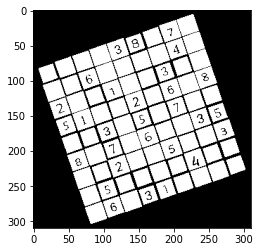

-19.0059814453125


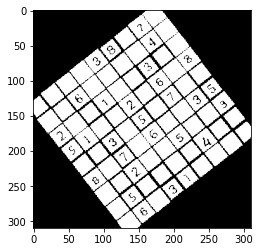

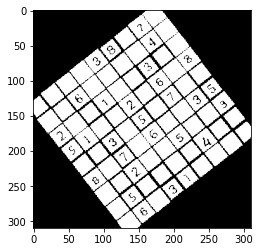

  0%|          | 20/5000 [00:11<47:28,  1.75it/s]

[1, 4, 5, 6, 3, 8, 9, 7, 2, 7, 3, 6, 5, 9, 2, 8, 4, 1, 2, 8, 9, 1, 4, 7, 3, 5, 6, 5, 1, 4, 7, 2, 3, 6, 9, 8, 6, 2, 3, 8, 5, 9, 7, 1, 4, 8, 9, 7, 4, 6, 1, 2, 3, 5, 4, 7, 2, 9, 8, 5, 1, 6, 3, 3, 5, 1, 2, 7, 6, 4, 8, 9, 9, 6, 8, 3, 1, 4, 5, 2, 7]
[1, 4, 5, 6, 3, 8, 9, 7, 2, 7, 3, 6, 5, 9, 2, 8, 4, 1, 2, 8, 9, 1, 4, 7, 3, 5, 6, 5, 1, 4, 7, 2, 3, 6, 9, 8, 6, 2, 3, 8, 5, 9, 7, 1, 4, 8, 9, 7, 4, 6, 1, 2, 3, 5, 4, 7, 2, 9, 8, 5, 1, 6, 3, 3, 5, 1, 2, 7, 6, 4, 8, 9, 9, 6, 8, 3, 1, 4, 5, 2, 7]
(310, 310)


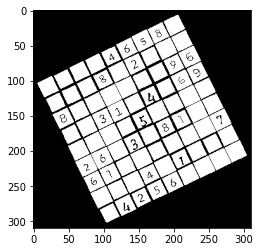

-26.029598236083984


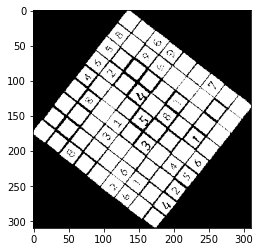

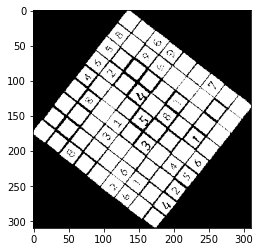

  0%|          | 21/5000 [00:12<46:50,  1.77it/s]

[1, 2, 7, 9, 4, 6, 5, 8, 3, 5, 9, 6, 8, 3, 2, 4, 7, 1, 8, 3, 4, 7, 1, 5, 2, 9, 6, 7, 5, 3, 1, 2, 4, 8, 6, 9, 4, 8, 1, 6, 5, 9, 7, 3, 2, 2, 6, 9, 3, 7, 8, 1, 5, 4, 6, 1, 5, 2, 8, 3, 9, 4, 7, 3, 7, 8, 4, 9, 1, 6, 2, 5, 9, 4, 2, 5, 6, 7, 3, 1, 8]
[1, 2, 7, 9, 4, 6, 5, 8, 3, 5, 9, 6, 8, 3, 2, 4, 7, 1, 8, 3, 4, 7, 1, 5, 2, 9, 6, 7, 5, 3, 1, 2, 4, 8, 6, 9, 4, 8, 1, 6, 5, 9, 7, 3, 2, 2, 6, 9, 3, 7, 8, 1, 5, 4, 6, 1, 5, 2, 8, 3, 9, 4, 7, 3, 7, 8, 4, 9, 1, 6, 2, 5, 9, 4, 2, 5, 6, 7, 3, 1, 8]
(310, 310)


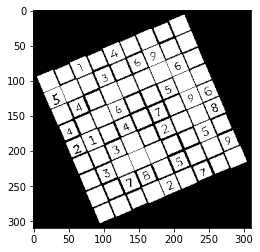

-22.976943969726562


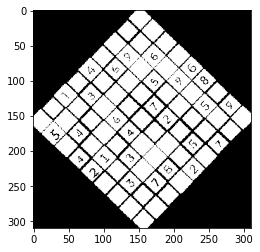

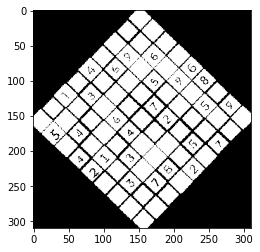

  0%|          | 22/5000 [00:12<46:22,  1.79it/s]

[7, 6, 1, 9, 4, 8, 2, 3, 5, 5, 8, 2, 3, 7, 6, 9, 1, 4, 3, 4, 9, 2, 5, 1, 8, 6, 7, 4, 7, 8, 6, 9, 3, 5, 2, 1, 2, 1, 5, 4, 8, 7, 3, 9, 6, 6, 9, 3, 5, 1, 2, 4, 7, 8, 8, 3, 4, 7, 6, 9, 1, 5, 2, 1, 2, 7, 8, 3, 5, 6, 4, 9, 9, 5, 6, 1, 2, 4, 7, 8, 3]
[7, 6, 1, 9, 4, 8, 2, 3, 5, 5, 8, 2, 3, 7, 6, 9, 1, 4, 3, 4, 9, 2, 5, 1, 8, 6, 7, 4, 7, 8, 6, 9, 3, 5, 2, 1, 2, 1, 5, 4, 8, 7, 3, 9, 6, 6, 9, 3, 5, 1, 2, 4, 7, 8, 8, 3, 4, 7, 6, 9, 1, 5, 2, 1, 2, 7, 8, 3, 5, 6, 4, 9, 9, 5, 6, 1, 2, 4, 7, 8, 3]
(310, 310)


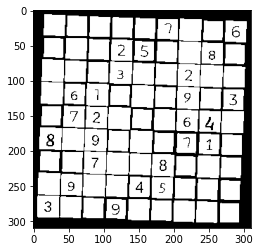

-1.8328393697738647


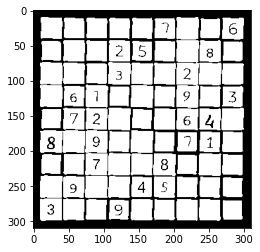

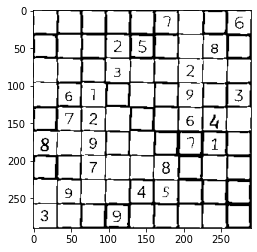

  0%|          | 23/5000 [00:13<48:46,  1.70it/s]

[9, 2, 5, 4, 8, 7, 1, 3, 6, 6, 1, 3, 2, 5, 9, 4, 8, 7, 7, 8, 4, 3, 1, 6, 2, 9, 5, 4, 6, 1, 8, 7, 2, 9, 5, 3, 5, 7, 2, 1, 9, 3, 6, 4, 8, 8, 3, 9, 5, 6, 4, 7, 1, 2, 1, 4, 7, 6, 3, 8, 5, 2, 9, 2, 9, 8, 7, 4, 5, 3, 6, 1, 3, 5, 6, 9, 2, 1, 8, 7, 4]
[-1, -1, -1, -1, -1, 7, -1, 3, 6, 6, -1, -1, 2, 5, -1, -1, 8, 7, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1, 6, -1, 8, -1, -1, 9, -1, 3, 5, 7, 2, -1, -1, -1, 6, 4, -1, 8, -1, 9, -1, -1, -1, -1, 1, -1, 1, -1, 7, -1, -1, 8, -1, -1, -1, -1, 9, -1, -1, 4, -1, -1, -1, -1, 3, -1, -1, 9, -1, -1, -1, -1, -1]
(310, 310)


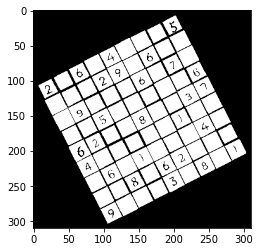

-26.965713500976562


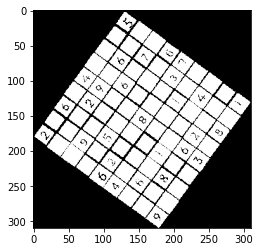

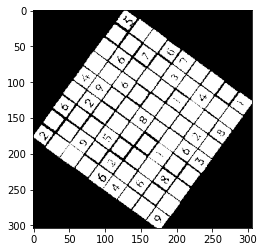

  0%|          | 24/5000 [00:14<48:44,  1.70it/s]

[2, 7, 6, 8, 4, 3, 9, 1, 5, 5, 1, 3, 2, 9, 7, 6, 8, 4, 8, 9, 4, 5, 1, 6, 3, 7, 2, 7, 8, 5, 3, 2, 1, 4, 9, 6, 6, 2, 1, 4, 8, 9, 5, 3, 7, 4, 3, 9, 6, 7, 5, 1, 2, 8, 3, 6, 7, 1, 5, 8, 2, 4, 9, 1, 4, 8, 9, 6, 2, 7, 5, 3, 9, 5, 2, 7, 3, 4, 8, 6, 1]
[2, 7, 6, 8, 4, 3, 9, 1, 5, 5, 1, 3, 2, 9, 7, 6, 8, 4, 8, 9, 4, 5, 1, 6, 3, 7, 2, 7, 8, 5, 3, 2, 1, 4, 9, 6, 6, 2, 1, 4, 8, 9, 5, 3, 7, 4, 3, 9, 6, 7, 5, 1, 2, 8, 3, 6, 7, 1, 5, 8, 2, 4, 9, 1, 4, 8, 9, 6, 2, 7, 5, 3, 9, 5, 2, 7, 3, 4, 8, 6, 1]
(310, 310)


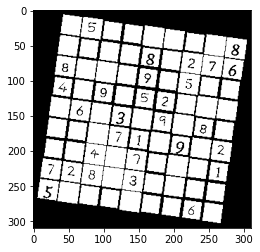

-8.027236938476562


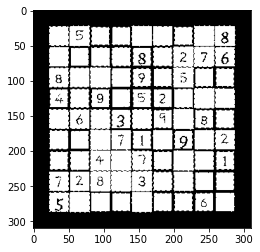

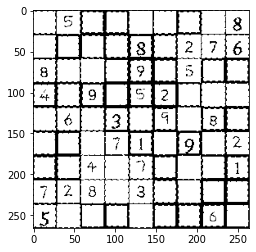

  0%|          | 25/5000 [00:14<49:03,  1.69it/s]

[2, 5, 7, 4, 6, 3, 1, 9, 8, 9, 4, 3, 1, 8, 5, 2, 7, 6, 8, 1, 6, 2, 9, 7, 5, 3, 4, 4, 7, 9, 8, 5, 2, 6, 1, 3, 1, 6, 2, 3, 4, 9, 7, 8, 5, 3, 8, 5, 7, 1, 6, 9, 4, 2, 6, 9, 4, 5, 7, 8, 3, 2, 1, 7, 2, 8, 6, 3, 1, 4, 5, 9, 5, 3, 1, 9, 2, 4, 8, 6, 7]
[2, 5, 7, 4, 6, 3, 1, -1, 8, 9, 4, 3, 1, 8, 5, 2, 7, 6, 8, 1, -1, 2, 9, 7, 5, 3, 4, 4, 7, 9, 8, 5, 2, 6, -1, -1, 1, 6, -1, 3, -1, 9, -1, 8, 5, 3, 8, -1, 7, 1, -1, 9, -1, 2, 6, 9, 4, -1, 7, -1, -1, -1, 1, 7, 2, 8, -1, 3, -1, -1, -1, -1, 5, -1, -1, -1, -1, -1, -1, 6, -1]
(310, 310)


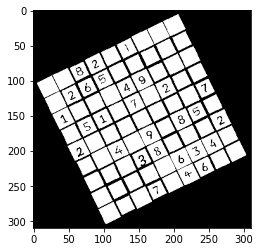

-25.981903076171875


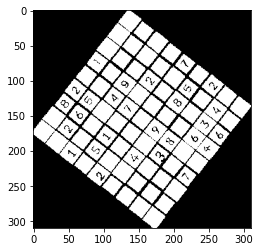

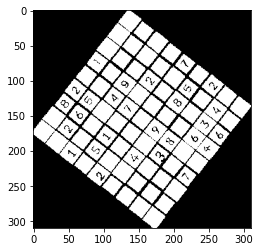

  1%|          | 26/5000 [00:15<53:18,  1.56it/s]

[9, 7, 8, 2, 6, 1, 5, 3, 4, 4, 2, 6, 5, 3, 7, 9, 8, 1, 1, 3, 5, 8, 4, 9, 7, 2, 6, 8, 5, 1, 4, 7, 3, 2, 6, 9, 2, 9, 3, 6, 5, 8, 4, 1, 7, 7, 6, 4, 1, 9, 2, 8, 5, 3, 6, 4, 9, 3, 8, 5, 1, 7, 2, 5, 1, 7, 9, 2, 6, 3, 4, 8, 3, 8, 2, 7, 1, 4, 6, 9, 5]
[9, 7, 8, 2, 6, 1, 5, 3, 4, 4, 2, 6, 5, 3, 7, 9, 8, 1, 1, 3, 5, 8, 4, 9, 7, 2, 6, 8, 5, 1, 4, 7, 3, 2, 6, 9, 2, 9, 3, 6, 5, 8, 4, 1, 7, 7, 6, 4, 1, 9, 2, 8, 5, 3, 6, 4, 9, 3, 8, 5, 1, 7, 2, 5, 1, 7, 9, 2, 6, 3, 4, 8, 3, 8, 2, 7, 1, 4, 6, 9, 5]
(310, 310)


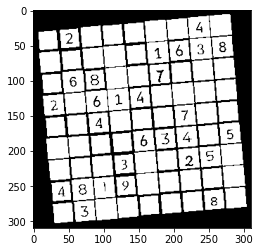

-4.993743896484375


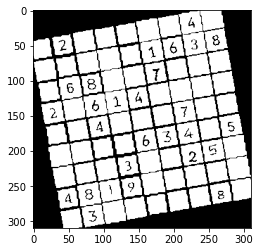

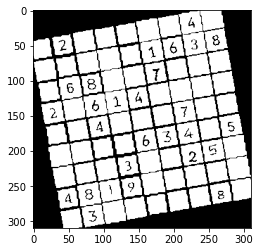

  1%|          | 27/5000 [00:16<53:32,  1.55it/s]

[1, 2, 3, 5, 8, 6, 9, 4, 7, 7, 4, 5, 2, 9, 1, 6, 3, 8, 9, 6, 8, 4, 3, 7, 5, 1, 2, 2, 7, 6, 1, 4, 5, 8, 9, 3, 3, 5, 4, 8, 2, 9, 7, 6, 1, 8, 1, 9, 7, 6, 3, 4, 2, 5, 6, 9, 7, 3, 1, 8, 2, 5, 4, 4, 8, 1, 9, 5, 2, 3, 7, 6, 5, 3, 2, 6, 7, 4, 1, 8, 9]
[1, 2, 3, 5, 8, 6, 9, 4, 7, 7, 4, 5, 2, 9, 1, 6, 3, 8, 9, 6, 8, 4, 3, 7, 5, 1, 2, 2, 7, 6, 1, 4, 5, 8, 9, 3, 3, 5, 4, 8, 2, 9, 7, 6, 1, 8, 1, 9, 7, 6, 3, 4, 2, 5, 6, 9, 7, 3, 1, 8, 2, 5, 4, 4, 8, 1, 9, 5, 2, 3, 7, 6, 5, 3, 2, 6, 7, 4, 1, 8, 9]
(310, 310)


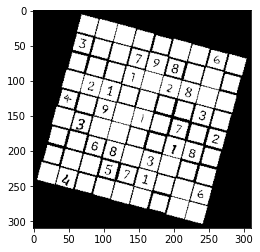

-14.995079040527344


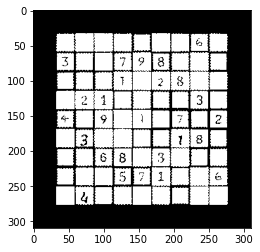

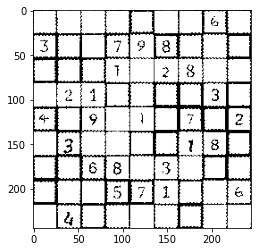

  1%|          | 28/5000 [00:16<50:21,  1.65it/s]

[9, 1, 8, 4, 3, 5, 2, 6, 7, 3, 6, 2, 7, 9, 8, 5, 4, 1, 7, 5, 4, 1, 6, 2, 8, 9, 3, 5, 2, 1, 9, 8, 7, 6, 3, 4, 4, 8, 9, 3, 1, 6, 7, 5, 2, 6, 3, 7, 2, 5, 4, 1, 8, 9, 2, 7, 6, 8, 4, 3, 9, 1, 5, 8, 9, 3, 5, 7, 1, 4, 2, 6, 1, 4, 5, 6, 2, 9, 3, 7, 8]
[-1, -1, -1, -1, -1, -1, -1, 6, -1, 3, -1, -1, 7, 9, 8, -1, -1, -1, -1, -1, -1, -1, -1, 2, 8, -1, -1, -1, 2, 1, -1, -1, -1, -1, 3, -1, 4, -1, 9, -1, -1, -1, -1, -1, 2, -1, 3, -1, -1, -1, -1, 1, 8, -1, -1, -1, 6, 8, -1, 3, -1, -1, -1, -1, -1, -1, 5, 7, 1, -1, -1, 6, -1, 4, -1, -1, -1, -1, -1, -1, -1]
(310, 310)


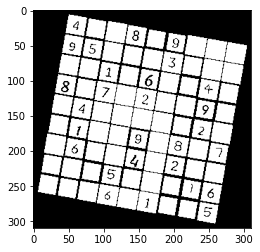

-10.036903381347656


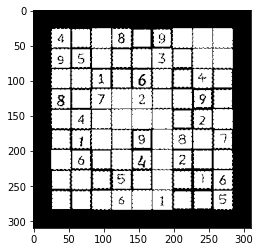

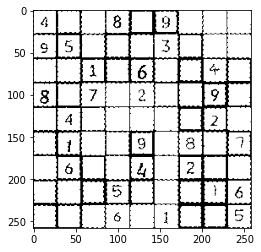

  1%|          | 29/5000 [00:17<51:25,  1.61it/s]

[4, 2, 3, 8, 7, 9, 6, 5, 1, 9, 5, 6, 4, 1, 3, 7, 8, 2, 7, 8, 1, 2, 6, 5, 3, 4, 9, 8, 3, 7, 1, 2, 6, 5, 9, 4, 6, 4, 9, 7, 5, 8, 1, 2, 3, 5, 1, 2, 3, 9, 4, 8, 6, 7, 1, 6, 5, 9, 4, 7, 2, 3, 8, 3, 7, 4, 5, 8, 2, 9, 1, 6, 2, 9, 8, 6, 3, 1, 4, 7, 5]
[4, 2, 3, 8, 7, 9, 6, 5, 1, 9, 5, 6, 4, 1, 3, 7, 8, 2, 7, 8, 1, 2, 6, 5, 3, 4, 9, 8, 3, 7, 1, 2, 6, 5, 9, 4, 6, 4, 9, -1, -1, -1, 1, 2, -1, 5, 1, 2, 3, 9, -1, 8, -1, 7, 1, 6, 5, -1, 4, -1, 2, -1, -1, 3, 7, 4, 5, 8, -1, -1, -1, 6, 2, 9, 8, 6, -1, 1, -1, -1, 5]
(310, 310)


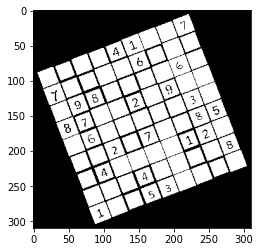

-20.99871826171875


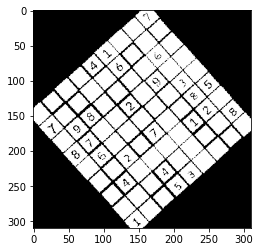

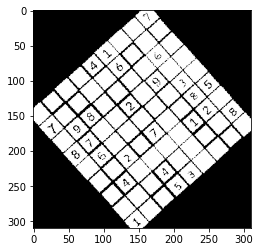

  1%|          | 30/5000 [00:17<49:09,  1.69it/s]

[2, 3, 6, 8, 4, 1, 5, 9, 7, 7, 5, 1, 2, 9, 6, 8, 4, 3, 4, 9, 8, 3, 5, 7, 2, 6, 1, 8, 7, 5, 6, 2, 3, 9, 1, 4, 9, 6, 4, 1, 8, 5, 7, 3, 2, 3, 1, 2, 9, 7, 4, 6, 8, 5, 5, 4, 3, 7, 6, 8, 1, 2, 9, 6, 2, 7, 4, 1, 9, 3, 5, 8, 1, 8, 9, 5, 3, 2, 4, 7, 6]
[2, 3, 6, 8, 4, 1, 5, 9, 7, 7, 5, 1, 2, 9, 6, 8, 4, 3, 4, 9, 8, 3, 5, 7, 2, 6, 1, 8, 7, 5, 6, 2, 3, 9, 1, 4, 9, 6, 4, 1, 8, 5, 7, 3, 2, 3, 1, 2, 9, 7, 4, 6, 8, 5, 5, 4, 3, 7, 6, 8, 1, 2, 9, 6, 2, 7, 4, 1, 9, 3, 5, 8, 1, 8, 9, 5, 3, 2, 4, 7, 6]
(310, 310)


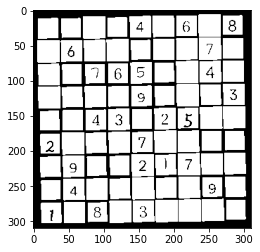

-1.0416259765625


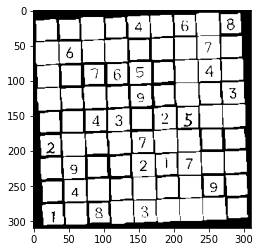

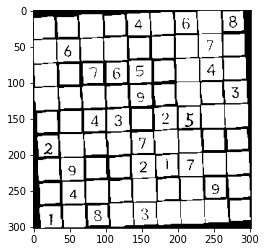

  1%|          | 31/5000 [00:18<48:02,  1.72it/s]

[5, 1, 9, 2, 4, 7, 6, 3, 8, 4, 6, 3, 8, 1, 9, 2, 7, 5, 8, 2, 7, 6, 5, 3, 1, 4, 9, 7, 5, 6, 1, 9, 4, 8, 2, 3, 9, 8, 4, 3, 6, 2, 5, 1, 7, 2, 3, 1, 5, 7, 8, 9, 6, 4, 3, 9, 5, 4, 2, 1, 7, 8, 6, 6, 4, 2, 7, 8, 5, 3, 9, 1, 1, 7, 8, 9, 3, 6, 4, 5, 2]
[5, 1, 9, 2, 4, 7, 6, 3, 8, 4, 6, 3, 8, 1, 9, 2, 7, 5, 8, 2, 7, 6, 5, 3, 1, 4, 9, 7, 5, 6, 1, 9, 4, 8, 2, 3, 9, 8, 4, 3, 6, 2, 5, 1, 7, 2, -1, -1, -1, 7, 8, 9, 6, 4, 3, 9, -1, 4, 2, 1, 7, 8, 6, 6, 4, -1, 7, -1, 5, 3, 9, 1, 1, 7, 8, 9, 3, 6, 4, 5, 2]
(310, 310)


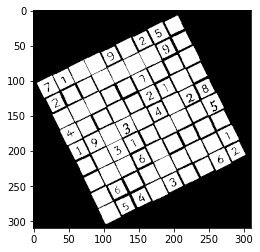

-25.9940185546875


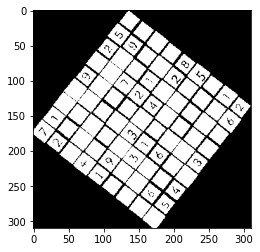

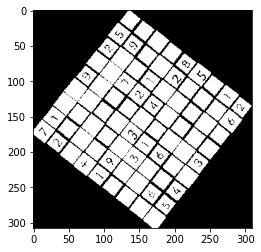

  1%|          | 32/5000 [00:18<47:30,  1.74it/s]

[7, 1, 6, 8, 9, 3, 2, 5, 4, 2, 4, 8, 5, 1, 6, 3, 9, 7, 5, 3, 9, 2, 4, 7, 8, 1, 6, 4, 8, 5, 7, 6, 2, 1, 3, 9, 1, 9, 7, 3, 5, 4, 6, 2, 8, 6, 2, 3, 1, 8, 9, 4, 7, 5, 9, 7, 1, 6, 2, 8, 5, 4, 3, 3, 6, 2, 4, 7, 5, 9, 8, 1, 8, 5, 4, 9, 3, 1, 7, 6, 2]
[7, 1, 6, 8, 9, 3, 2, 5, 4, 2, 4, 8, 5, 1, 6, 3, 9, 7, 5, 3, 9, 2, 4, 7, 8, 1, 6, 4, 8, 5, 7, 6, 2, 1, 3, 9, 1, 9, 7, 3, 5, 4, 6, 2, 8, 6, 2, 3, 1, 8, 9, 4, 7, 5, 9, 7, 1, 6, 2, 8, 5, 4, 3, 3, 6, 2, 4, 7, 5, 9, 8, 1, 8, 5, 4, 9, 3, 1, 7, 6, 2]
(310, 310)


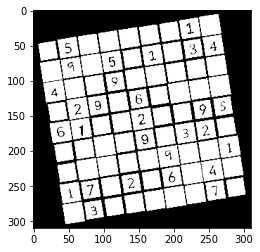

-9.024543762207031


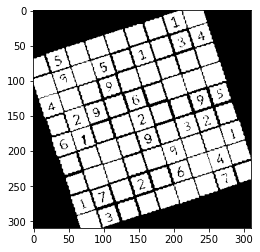

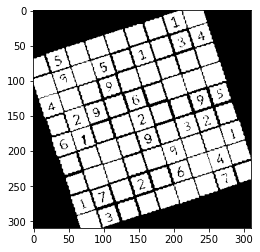

  1%|          | 33/5000 [00:19<49:48,  1.66it/s]

[8, 5, 3, 6, 4, 2, 7, 1, 9, 7, 9, 2, 5, 8, 1, 6, 3, 4, 4, 6, 1, 9, 7, 3, 2, 5, 8, 3, 2, 9, 4, 6, 5, 1, 8, 7, 6, 1, 7, 3, 2, 8, 4, 9, 5, 5, 8, 4, 1, 9, 7, 3, 2, 6, 2, 4, 5, 7, 3, 9, 8, 6, 1, 1, 7, 8, 2, 5, 6, 9, 4, 3, 9, 3, 6, 8, 1, 4, 5, 7, 2]
[8, 5, 3, 6, 4, 2, 7, 1, 9, 7, 9, 2, 5, 8, 1, 6, 3, 4, 4, 6, 1, 9, 7, 3, 2, 5, 8, 3, 2, 9, 4, 6, 5, 1, 8, 7, 6, 1, 7, 3, 2, 8, 4, 9, 5, 5, 8, 4, 1, 9, 7, 3, 2, 6, 2, 4, 5, 7, 3, 9, 8, 6, 1, 1, 7, 8, 2, 5, 6, 9, 4, 3, 9, 3, 6, 8, 1, 4, 5, 7, 2]
(310, 310)


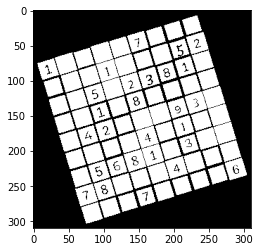

-16.850753784179688


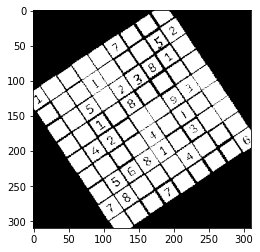

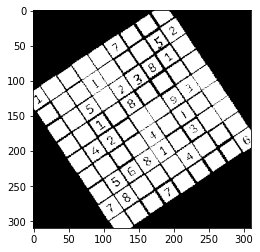

  1%|          | 34/5000 [00:20<48:14,  1.72it/s]

[1, 2, 8, 4, 5, 7, 6, 9, 3, 3, 6, 4, 1, 9, 8, 7, 5, 2, 9, 7, 5, 6, 2, 3, 8, 1, 4, 5, 9, 1, 3, 8, 6, 2, 4, 7, 6, 4, 2, 5, 7, 1, 9, 3, 8, 8, 3, 7, 2, 4, 9, 1, 6, 5, 4, 5, 6, 8, 1, 2, 3, 7, 9, 7, 8, 3, 9, 6, 4, 5, 2, 1, 2, 1, 9, 7, 3, 5, 4, 8, 6]
[1, 2, 8, 4, 5, 7, 6, 9, 3, 3, 6, 4, 1, 9, 8, 7, 5, 2, 9, 7, 5, 6, 2, 3, 8, 1, 4, 5, 9, 1, 3, 8, 6, 2, 4, 7, 6, 4, 2, 5, 7, 1, 9, 3, 8, 8, 3, 7, 2, 4, 9, 1, 6, 5, 4, 5, 6, 8, 1, 2, 3, 7, 9, 7, 8, 3, 9, 6, 4, 5, 2, 1, 2, 1, 9, 7, 3, 5, 4, 8, 6]
(310, 310)


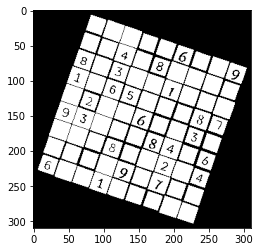

-19.09349250793457


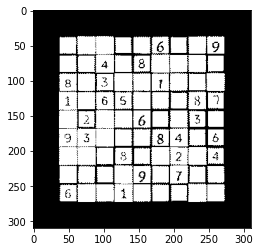

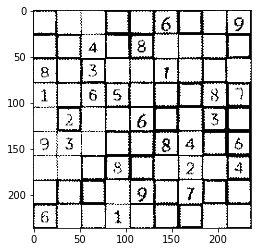

  1%|          | 35/5000 [00:20<46:15,  1.79it/s]

[2, 7, 1, 3, 5, 6, 8, 4, 9, 5, 9, 4, 2, 8, 7, 6, 1, 3, 8, 6, 3, 9, 4, 1, 5, 7, 2, 1, 4, 6, 5, 3, 2, 9, 8, 7, 7, 2, 8, 4, 6, 9, 1, 3, 5, 9, 3, 5, 7, 1, 8, 4, 2, 6, 3, 1, 9, 8, 7, 5, 2, 6, 4, 4, 8, 2, 6, 9, 3, 7, 5, 1, 6, 5, 7, 1, 2, 4, 3, 9, 8]
[-1, -1, -1, 3, -1, 6, -1, -1, 9, -1, -1, 4, -1, 8, -1, -1, -1, -1, 8, -1, 3, -1, -1, 1, -1, -1, -1, 1, -1, 6, 5, -1, -1, -1, 8, 7, -1, 2, -1, -1, 6, -1, -1, 3, -1, 9, 3, -1, -1, -1, 8, 4, -1, 6, -1, -1, -1, 8, -1, -1, 2, -1, 4, -1, -1, -1, -1, 9, -1, 7, -1, -1, 6, -1, -1, 1, -1, -1, -1, -1, -1]
(310, 310)


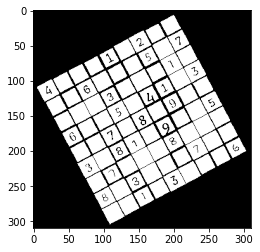

-28.003684997558594


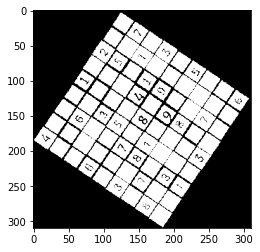

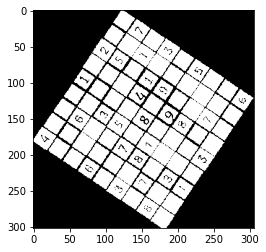

  1%|          | 36/5000 [00:21<45:40,  1.81it/s]

[4, 3, 5, 9, 1, 7, 2, 6, 8, 9, 1, 6, 8, 4, 2, 5, 3, 7, 7, 8, 2, 3, 5, 6, 4, 1, 9, 6, 2, 9, 5, 7, 4, 1, 8, 3, 1, 5, 7, 6, 8, 3, 9, 2, 4, 3, 4, 8, 1, 2, 9, 6, 7, 5, 5, 7, 4, 2, 6, 8, 3, 9, 1, 8, 6, 3, 4, 9, 1, 7, 5, 2, 2, 9, 1, 7, 3, 5, 8, 4, 6]
[4, 3, 5, 9, 1, 7, 2, 6, 8, 9, 1, 6, 8, 4, 2, 5, 3, 7, 7, 8, 2, 3, 5, 6, 4, 1, 9, 6, 2, 9, 5, 7, 4, 1, 8, 3, 1, 5, 7, 6, 8, 3, 9, 2, 4, 3, 4, 8, 1, 2, 9, 6, 7, 5, 5, 7, 4, 2, 6, 8, 3, 9, 1, 8, 6, 3, 4, 9, 1, 7, 5, 2, 2, 9, 1, 7, 3, 5, 8, 4, 6]
(310, 310)


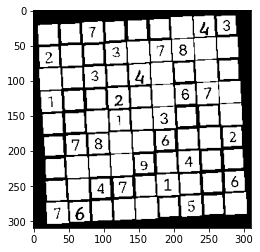

-3.012786865234375


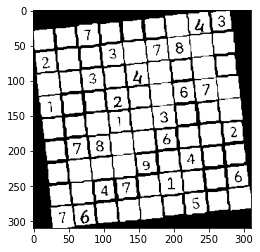

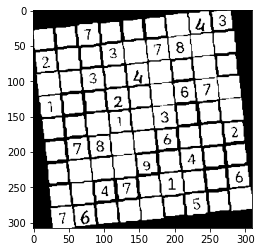

  1%|          | 37/5000 [00:21<44:58,  1.84it/s]

[6, 5, 7, 9, 1, 8, 2, 4, 3, 2, 4, 9, 3, 6, 7, 8, 1, 5, 8, 1, 3, 5, 4, 2, 7, 6, 9, 1, 3, 5, 2, 8, 9, 6, 7, 4, 4, 2, 6, 1, 7, 3, 9, 5, 8, 9, 7, 8, 4, 5, 6, 1, 3, 2, 3, 8, 1, 6, 9, 5, 4, 2, 7, 5, 9, 4, 7, 2, 1, 3, 8, 6, 7, 6, 2, 8, 3, 4, 5, 9, 1]
[6, 5, 7, 9, 1, 8, 2, 4, 3, 2, 4, 9, 3, 6, 7, 8, 1, 5, 8, 1, 3, 5, 4, 2, 7, 6, 9, 1, 3, 5, 2, 8, 9, 6, 7, 4, 4, 2, 6, 1, 7, 3, 9, 5, 8, 9, 7, 8, 4, 5, 6, 1, 3, 2, 3, 8, 1, 6, 9, 5, 4, 2, 7, 5, 9, 4, 7, 2, 1, 3, 8, 6, 7, 6, 2, 8, 3, 4, 5, 9, 1]
(310, 310)


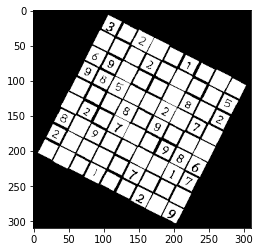

-26.916553497314453


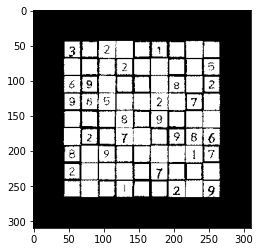

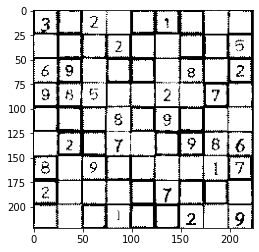

  1%|          | 38/5000 [00:22<44:35,  1.85it/s]

[3, 5, 2, 9, 8, 1, 7, 6, 4, 4, 7, 8, 2, 3, 6, 1, 9, 5, 6, 9, 1, 5, 7, 4, 8, 3, 2, 9, 8, 5, 6, 1, 2, 4, 7, 3, 7, 6, 3, 8, 4, 9, 5, 2, 1, 1, 2, 4, 7, 5, 3, 9, 8, 6, 8, 4, 9, 3, 2, 5, 6, 1, 7, 2, 1, 6, 4, 9, 7, 3, 5, 8, 5, 3, 7, 1, 6, 8, 2, 4, 9]
[3, 5, 2, 9, 8, 1, 7, 6, 4, 4, 7, 8, 2, 3, 6, 1, 9, 5, 6, 9, 1, 5, 7, 4, 8, 3, 2, 9, 8, 5, 6, 1, 2, -1, 7, 3, 7, 6, 3, 8, 4, 9, 5, -1, -1, 1, 2, 4, 7, 5, 3, 9, 8, 6, 8, 4, 9, 3, 2, -1, -1, 1, 7, 2, 1, 6, 4, 9, 7, 3, -1, -1, 5, 3, 7, 1, 6, 8, 2, -1, 9]
(310, 310)


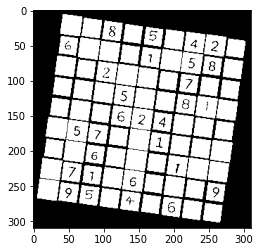

-8.011231422424316


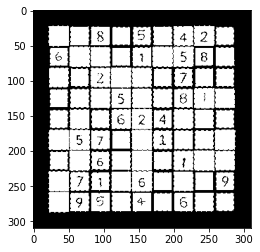

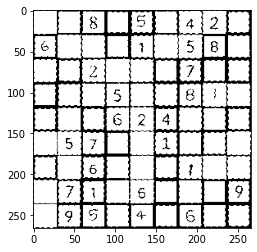

  1%|          | 39/5000 [00:22<44:13,  1.87it/s]

[7, 3, 8, 9, 5, 6, 4, 2, 1, 6, 4, 9, 2, 1, 7, 5, 8, 3, 5, 1, 2, 4, 3, 8, 7, 9, 6, 9, 6, 4, 5, 7, 3, 8, 1, 2, 1, 8, 3, 6, 2, 4, 9, 5, 7, 2, 5, 7, 8, 9, 1, 3, 6, 4, 4, 2, 6, 7, 8, 9, 1, 3, 5, 8, 7, 1, 3, 6, 5, 2, 4, 9, 3, 9, 5, 1, 4, 2, 6, 7, 8]
[7, 3, 8, 9, 5, 6, 4, 2, 1, 6, 4, 9, 2, 1, 7, 5, 8, 3, 5, 1, 2, 4, 3, 8, 7, 9, 6, 9, 6, 4, 5, 7, 3, 8, -1, -1, 1, 8, 3, 6, 2, 4, -1, -1, 7, -1, 5, 7, 8, -1, 1, -1, -1, -1, 4, 2, 6, 7, -1, 9, 1, -1, -1, 8, 7, 1, -1, 6, -1, -1, -1, 9, 3, 9, 5, 1, 4, -1, 6, -1, -1]
(310, 310)


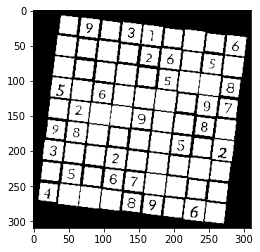

-6.9529571533203125


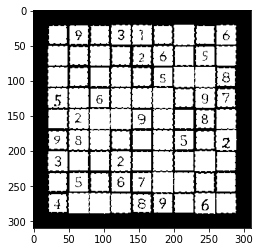

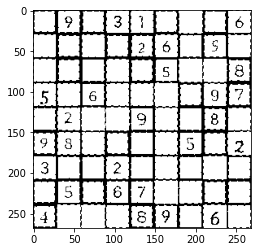

  1%|          | 40/5000 [00:23<46:08,  1.79it/s]

[2, 9, 5, 3, 1, 8, 7, 4, 6, 8, 1, 4, 7, 2, 6, 9, 5, 3, 6, 3, 7, 9, 4, 5, 2, 1, 8, 5, 4, 6, 8, 3, 2, 1, 9, 7, 7, 2, 3, 5, 9, 1, 6, 8, 4, 9, 8, 1, 4, 6, 7, 5, 3, 2, 3, 6, 9, 2, 5, 4, 8, 7, 1, 1, 5, 8, 6, 7, 3, 4, 2, 9, 4, 7, 2, 1, 8, 9, 3, 6, 5]
[2, 9, 5, 3, 1, 8, 7, 4, 6, 8, 1, 4, 7, 2, 6, 9, 5, 3, 6, 3, 7, 9, 4, 5, 2, 1, 8, 5, 4, 6, 8, 3, 2, 1, 9, 7, 7, 2, 3, 5, 9, 1, 6, 8, -1, 9, 8, 1, 4, 6, -1, 5, 3, 2, 3, 6, 9, 2, 5, -1, -1, -1, -1, 1, 5, 8, 6, 7, -1, -1, -1, -1, 4, 7, 2, 1, 8, 9, -1, 6, -1]
(310, 310)


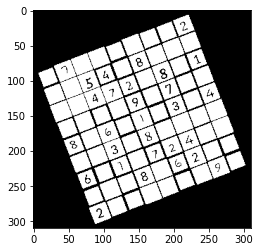

-20.984901428222656


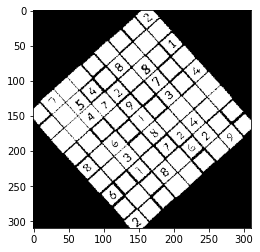

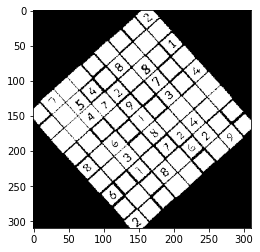

  1%|          | 41/5000 [00:23<45:35,  1.81it/s]

[3, 7, 8, 1, 6, 9, 5, 4, 2, 1, 2, 5, 4, 3, 8, 9, 7, 6, 9, 6, 4, 7, 2, 5, 8, 3, 1, 4, 1, 2, 6, 9, 3, 7, 8, 5, 8, 9, 6, 5, 1, 7, 3, 2, 4, 7, 5, 3, 2, 8, 4, 1, 6, 9, 6, 8, 1, 9, 7, 2, 4, 5, 3, 5, 3, 9, 8, 4, 6, 2, 1, 7, 2, 4, 7, 3, 5, 1, 6, 9, 8]
[3, 7, 8, 1, 6, 9, 5, 4, 2, 1, 2, 5, 4, 3, 8, 9, 7, 6, 9, 6, 4, 7, 2, 5, 8, 3, 1, 4, 1, 2, 6, 9, 3, 7, 8, 5, 8, 9, 6, 5, 1, 7, 3, 2, 4, 7, 5, 3, 2, 8, 4, 1, 6, 9, 6, 8, 1, 9, 7, 2, 4, 5, 3, 5, 3, 9, 8, 4, 6, 2, 1, 7, 2, 4, 7, 3, 5, 1, 6, 9, 8]
(310, 310)


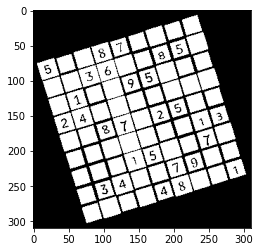

-17.020523071289062


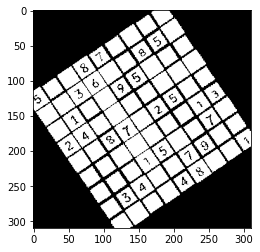

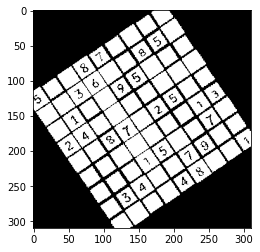

  1%|          | 42/5000 [00:24<45:10,  1.83it/s]

[5, 2, 6, 8, 7, 4, 1, 3, 9, 4, 9, 3, 6, 2, 1, 8, 5, 7, 8, 1, 7, 3, 9, 5, 6, 4, 2, 2, 4, 1, 5, 3, 9, 7, 6, 8, 3, 6, 8, 7, 1, 2, 5, 9, 4, 7, 5, 9, 4, 8, 6, 2, 1, 3, 9, 8, 2, 1, 5, 3, 4, 7, 6, 1, 3, 4, 2, 6, 7, 9, 8, 5, 6, 7, 5, 9, 4, 8, 3, 2, 1]
[5, 2, 6, 8, 7, 4, 1, 3, 9, 4, 9, 3, 6, 2, 1, 8, 5, 7, 8, 1, 7, 3, 9, 5, 6, 4, 2, 2, 4, 1, 5, 3, 9, 7, 6, 8, 3, 6, 8, 7, 1, 2, 5, 9, 4, 7, 5, 9, 4, 8, 6, 2, 1, 3, 9, 8, 2, 1, 5, 3, 4, 7, 6, 1, 3, 4, 2, 6, 7, 9, 8, 5, 6, 7, 5, 9, 4, 8, 3, 2, 1]
(310, 310)


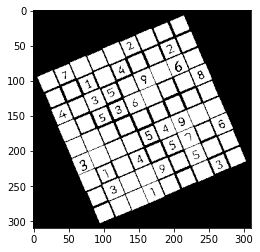

-23.008865356445312


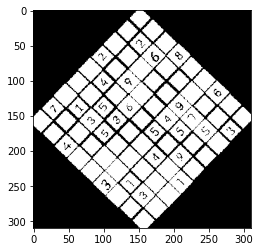

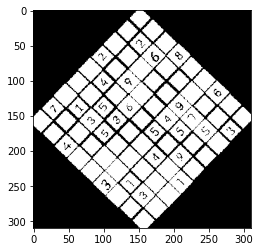

  1%|          | 43/5000 [00:25<46:02,  1.79it/s]

[5, 7, 8, 6, 1, 2, 3, 9, 4, 9, 6, 1, 7, 4, 3, 8, 2, 5, 4, 2, 3, 5, 8, 9, 1, 6, 7, 7, 9, 5, 3, 6, 1, 2, 4, 8, 1, 4, 2, 9, 7, 8, 6, 5, 3, 3, 8, 6, 2, 5, 4, 9, 7, 1, 2, 1, 9, 4, 3, 5, 7, 8, 6, 6, 3, 4, 8, 9, 7, 5, 1, 2, 8, 5, 7, 1, 2, 6, 4, 3, 9]
[5, 7, 8, 6, 1, 2, 3, 9, 4, 9, 6, 1, 7, 4, 3, 8, 2, 5, 4, 2, 3, 5, 8, 9, 1, 6, 7, 7, 9, 5, 3, 6, 1, 2, 4, 8, 1, 4, 2, 9, 7, 8, 6, 5, 3, 3, 8, 6, 2, 5, 4, 9, 7, 1, 2, 1, 9, 4, 3, 5, 7, 8, 6, 6, 3, 4, 8, 9, 7, 5, 1, 2, 8, 5, 7, 1, 2, 6, 4, 3, 9]
(310, 310)


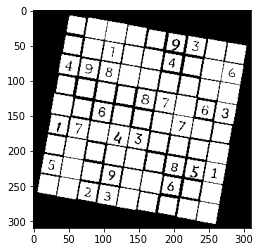

-10.007979393005371


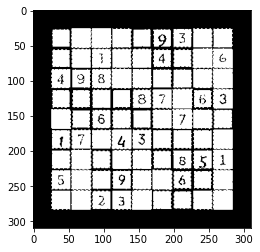

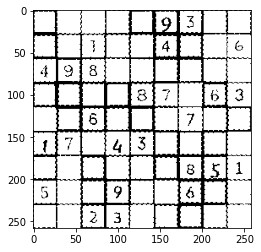

  1%|          | 44/5000 [00:25<53:17,  1.55it/s]

[6, 2, 5, 7, 1, 9, 3, 4, 8, 7, 3, 1, 8, 2, 4, 5, 9, 6, 4, 9, 8, 5, 6, 3, 1, 2, 7, 2, 5, 4, 1, 8, 7, 9, 6, 3, 3, 8, 6, 2, 9, 5, 7, 1, 4, 1, 7, 9, 4, 3, 6, 2, 8, 5, 9, 4, 3, 6, 7, 2, 8, 5, 1, 5, 1, 7, 9, 4, 8, 6, 3, 2, 8, 6, 2, 3, 5, 1, 4, 7, 9]
[6, 2, 5, 7, 1, 9, 3, 4, 8, 7, 3, 1, 8, 2, 4, 5, 9, 6, 4, 9, 8, 5, 6, 3, 1, 2, 7, 2, 5, 4, 1, 8, 7, -1, 6, 3, 3, 8, 6, 2, 9, -1, 7, -1, 4, 1, 7, 9, 4, 3, 6, -1, -1, -1, 9, 4, 3, 6, -1, 2, 8, 5, 1, 5, 1, 7, 9, -1, -1, 6, -1, -1, 8, 6, 2, 3, -1, -1, -1, -1, -1]
(310, 310)


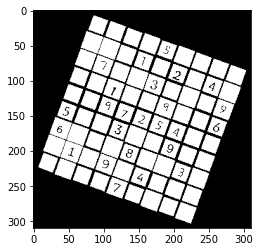

-20.164833068847656


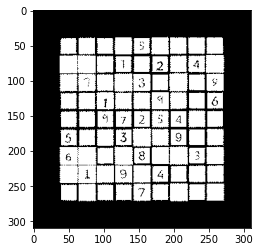

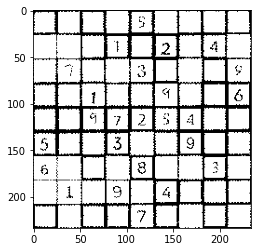

  1%|          | 45/5000 [00:26<50:11,  1.65it/s]

[9, 3, 4, 6, 5, 7, 1, 8, 2, 8, 5, 6, 1, 9, 2, 7, 4, 3, 1, 7, 2, 4, 3, 8, 5, 6, 9, 7, 2, 1, 8, 4, 9, 3, 5, 6, 3, 6, 9, 7, 2, 5, 4, 1, 8, 5, 4, 8, 3, 1, 6, 9, 2, 7, 6, 9, 7, 5, 8, 1, 2, 3, 4, 2, 1, 3, 9, 6, 4, 8, 7, 5, 4, 8, 5, 2, 7, 3, 6, 9, 1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2, -1, 4, -1, -1, -1, -1, -1, 3, -1, -1, -1, 9, -1, -1, 1, -1, -1, 9, -1, -1, 6, -1, -1, 9, 7, 2, 5, 4, -1, -1, 5, -1, -1, 3, -1, -1, 9, -1, -1, 6, -1, -1, -1, 8, -1, -1, 3, -1, -1, 1, -1, 9, -1, 4, -1, -1, -1, -1, -1, -1, -1, 7, -1, -1, -1, -1]
(310, 310)


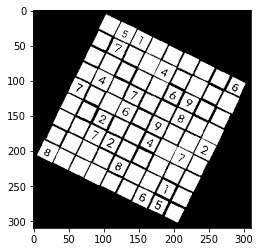

-26.14684295654297


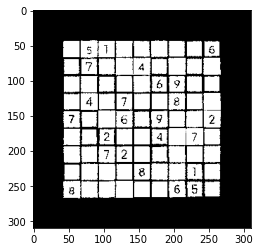

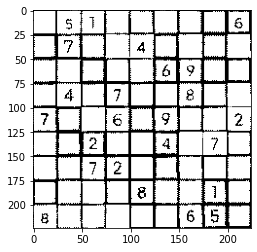

  1%|          | 46/5000 [00:26<48:26,  1.70it/s]

[9, 5, 1, 3, 2, 8, 7, 4, 6, 6, 7, 8, 9, 4, 1, 5, 2, 3, 2, 3, 4, 5, 7, 6, 9, 8, 1, 1, 4, 9, 7, 3, 2, 8, 6, 5, 7, 8, 5, 6, 1, 9, 4, 3, 2, 3, 6, 2, 8, 5, 4, 1, 7, 9, 4, 1, 7, 2, 6, 5, 3, 9, 8, 5, 9, 6, 4, 8, 3, 2, 1, 7, 8, 2, 3, 1, 9, 7, 6, 5, 4]
[9, 5, 1, 3, 2, 8, 7, 4, 6, 6, 7, 8, 9, 4, 1, 5, 2, 3, 2, 3, 4, 5, 7, 6, 9, 8, 1, 1, 4, 9, 7, 3, 2, 8, 6, -1, 7, 8, 5, 6, 1, 9, 4, 3, 2, 3, 6, 2, 8, 5, 4, -1, 7, 9, 4, 1, 7, 2, 6, 5, -1, -1, -1, 5, 9, 6, 4, 8, -1, -1, 1, -1, 8, 2, 3, 1, 9, 7, 6, 5, -1]
(310, 310)


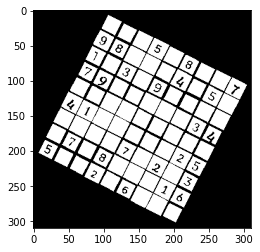

-27.135141372680664


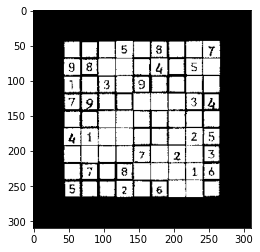

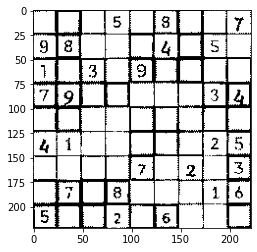

  1%|          | 47/5000 [00:27<50:52,  1.62it/s]

[6, 4, 2, 5, 3, 8, 1, 9, 7, 9, 8, 7, 1, 6, 4, 3, 5, 2, 1, 5, 3, 7, 9, 2, 4, 6, 8, 7, 9, 5, 6, 2, 1, 8, 3, 4, 3, 2, 8, 4, 5, 9, 6, 7, 1, 4, 1, 6, 3, 8, 7, 9, 2, 5, 8, 6, 1, 9, 7, 5, 2, 4, 3, 2, 7, 9, 8, 4, 3, 5, 1, 6, 5, 3, 4, 2, 1, 6, 7, 8, 9]
[6, 4, 2, 5, 3, 8, 1, 9, 7, 9, 8, 7, 1, 6, 4, 3, 5, 2, 1, 5, 3, 7, 9, 2, 4, 6, 8, 7, 9, 5, 6, 2, 1, 8, 3, 4, 3, 2, 8, 4, 5, 9, -1, 7, 1, 4, 1, 6, 3, 8, -1, -1, 2, 5, 8, 6, 1, 9, 7, -1, 2, -1, 3, 2, 7, 9, 8, -1, -1, -1, 1, 6, 5, 3, 4, 2, 1, 6, -1, -1, -1]
(310, 310)


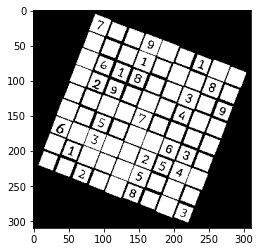

-20.99285125732422


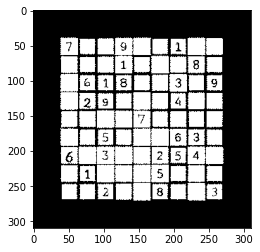

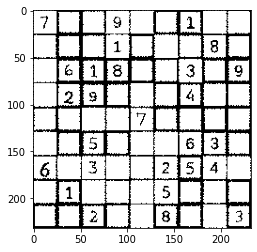

  1%|          | 48/5000 [00:28<49:18,  1.67it/s]

[7, 5, 8, 9, 2, 3, 1, 6, 4, 3, 9, 4, 1, 6, 7, 2, 8, 5, 2, 6, 1, 8, 5, 4, 3, 7, 9, 8, 2, 9, 5, 3, 6, 4, 1, 7, 4, 3, 6, 2, 7, 1, 9, 5, 8, 1, 7, 5, 4, 8, 9, 6, 3, 2, 6, 8, 3, 7, 9, 2, 5, 4, 1, 9, 1, 7, 3, 4, 5, 8, 2, 6, 5, 4, 2, 6, 1, 8, 7, 9, 3]
[7, 5, 8, 9, 2, 3, 1, 6, 4, 3, 9, 4, 1, 6, 7, 2, 8, 5, 2, 6, 1, 8, 5, 4, 3, 7, 9, 8, 2, 9, 5, 3, 6, 4, 1, 7, 4, 3, 6, 2, 7, 1, 9, 5, 8, 1, 7, 5, 4, -1, -1, 6, 3, 2, 6, 8, 3, 7, 9, 2, 5, 4, -1, 9, 1, 7, 3, -1, 5, -1, -1, -1, 5, 4, 2, 6, -1, 8, -1, -1, 3]
(310, 310)


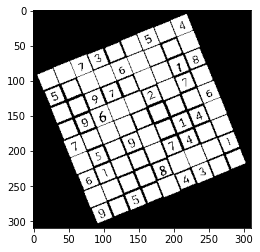

-21.979721069335938


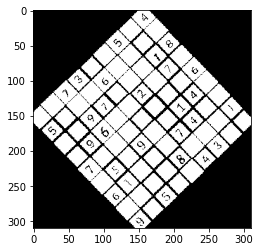

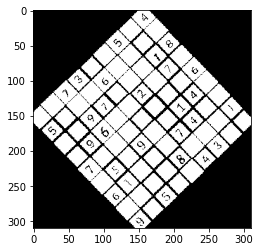

  1%|          | 49/5000 [00:28<50:12,  1.64it/s]

[8, 6, 7, 3, 1, 9, 5, 2, 4, 5, 4, 1, 2, 6, 8, 7, 3, 9, 3, 2, 9, 7, 4, 5, 6, 1, 8, 1, 9, 6, 4, 3, 2, 8, 7, 5, 7, 3, 4, 8, 5, 1, 2, 9, 6, 2, 5, 8, 9, 7, 6, 1, 4, 3, 6, 1, 3, 5, 9, 7, 4, 8, 2, 4, 7, 2, 6, 8, 3, 9, 5, 1, 9, 8, 5, 1, 2, 4, 3, 6, 7]
[8, 6, 7, 3, 1, 9, 5, 2, 4, 5, 4, 1, 2, 6, 8, 7, 3, 9, 3, 2, 9, 7, 4, 5, 6, 1, 8, 1, 9, 6, 4, 3, 2, 8, 7, 5, 7, 3, 4, 8, 5, 1, 2, 9, 6, 2, 5, 8, 9, 7, 6, 1, 4, 3, 6, 1, 3, 5, 9, 7, 4, 8, 2, 4, 7, 2, 6, 8, 3, 9, 5, 1, 9, 8, 5, 1, 2, 4, 3, 6, 7]
(310, 310)


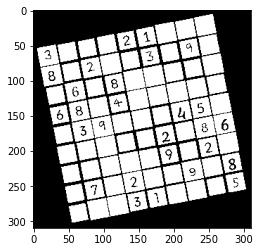

-11.013832092285156


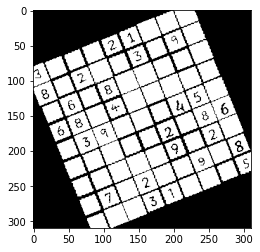

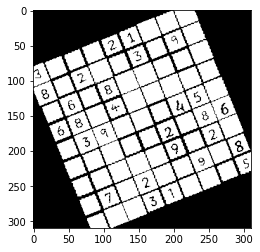

  1%|          | 50/5000 [00:29<50:16,  1.64it/s]

[3, 9, 7, 5, 2, 1, 8, 6, 4, 8, 4, 2, 6, 7, 3, 5, 9, 1, 1, 6, 5, 8, 9, 4, 3, 7, 2, 6, 8, 1, 4, 5, 7, 2, 3, 9, 2, 3, 9, 1, 8, 6, 4, 5, 7, 7, 5, 4, 9, 3, 2, 1, 8, 6, 5, 1, 8, 7, 4, 9, 6, 2, 3, 4, 7, 3, 2, 6, 5, 9, 1, 8, 9, 2, 6, 3, 1, 8, 7, 4, 5]
[3, 9, 7, 5, 2, 1, 8, 6, 4, 8, 4, 2, 6, 7, 3, 5, 9, 1, 1, 6, 5, 8, 9, 4, 3, 7, 2, 6, 8, 1, 4, 5, 7, 2, 3, 9, 2, 3, 9, 1, 8, 6, 4, 5, 7, 7, 5, 4, 9, 3, 2, 1, 8, 6, 5, 1, 8, 7, 4, 9, 6, 2, 3, 4, 7, 3, 2, 6, 5, 9, 1, 8, 9, 2, 6, 3, 1, 8, 7, 4, 5]
(310, 310)


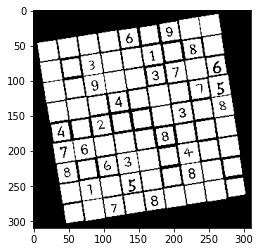

-8.972625732421875


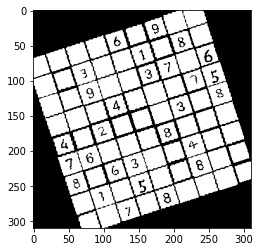

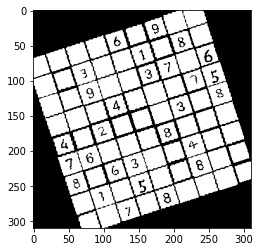

  1%|          | 51/5000 [00:30<50:55,  1.62it/s]

[2, 4, 8, 7, 6, 5, 9, 3, 1, 6, 7, 3, 9, 4, 1, 5, 8, 2, 1, 5, 9, 8, 2, 3, 7, 4, 6, 3, 8, 1, 4, 9, 2, 6, 7, 5, 4, 9, 2, 6, 5, 7, 3, 1, 8, 7, 6, 5, 1, 3, 8, 2, 9, 4, 8, 2, 6, 3, 1, 9, 4, 5, 7, 9, 1, 4, 5, 7, 6, 8, 2, 3, 5, 3, 7, 2, 8, 4, 1, 6, 9]
[2, 4, 8, 7, 6, 5, 9, 3, 1, 6, 7, 3, 9, 4, 1, 5, 8, 2, 1, 5, 9, 8, 2, 3, 7, 4, 6, 3, 8, 1, 4, 9, 2, 6, 7, 5, 4, 9, 2, 6, 5, 7, 3, 1, 8, 7, 6, 5, 1, 3, 8, 2, 9, 4, 8, 2, 6, 3, 1, 9, 4, 5, 7, 9, 1, 4, 5, 7, 6, 8, 2, 3, 5, 3, 7, 2, 8, 4, 1, 6, 9]
(310, 310)


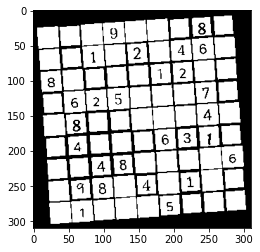

-4.0063934326171875


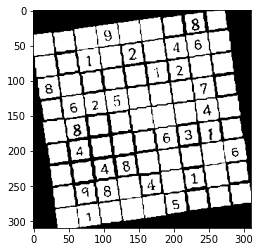

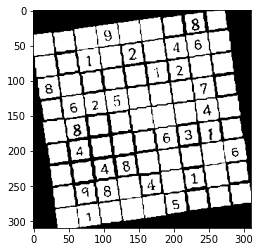

  1%|          | 52/5000 [00:30<53:03,  1.55it/s]

[4, 2, 6, 9, 5, 3, 7, 8, 1, 9, 5, 1, 7, 2, 8, 4, 6, 3, 8, 7, 3, 4, 6, 1, 2, 5, 9, 1, 6, 2, 5, 3, 4, 9, 7, 8, 3, 8, 5, 1, 7, 9, 6, 4, 2, 7, 4, 9, 2, 8, 6, 3, 1, 5, 2, 3, 4, 8, 1, 7, 5, 9, 6, 5, 9, 8, 6, 4, 2, 1, 3, 7, 6, 1, 7, 3, 9, 5, 8, 2, 4]
[4, 2, 6, 9, 5, 3, 7, 8, 1, 9, 5, 1, 7, 2, 8, 4, 6, 3, 8, 7, 3, 4, 6, 1, 2, 5, 9, 1, 6, 2, 5, 3, 4, 9, 7, 8, 3, 8, 5, 1, 7, 9, 6, 4, 2, 7, 4, 9, 2, 8, 6, 3, 1, 5, 2, 3, 4, 8, 1, 7, 5, 9, 6, 5, 9, 8, 6, 4, 2, 1, 3, 7, 6, 1, 7, 3, 9, 5, 8, 2, 4]
(310, 310)


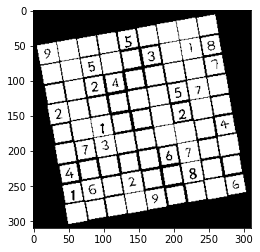

-9.994583129882812


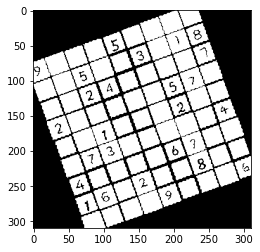

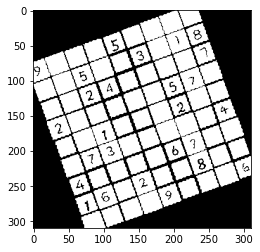

  1%|          | 53/5000 [00:31<51:51,  1.59it/s]

[9, 1, 6, 8, 5, 7, 3, 4, 2, 7, 4, 5, 6, 2, 3, 9, 1, 8, 8, 3, 2, 4, 1, 9, 6, 5, 7, 2, 8, 4, 3, 6, 1, 5, 7, 9, 6, 9, 1, 7, 4, 5, 2, 8, 3, 5, 7, 3, 9, 8, 2, 1, 6, 4, 4, 2, 8, 5, 3, 6, 7, 9, 1, 1, 6, 9, 2, 7, 4, 8, 3, 5, 3, 5, 7, 1, 9, 8, 4, 2, 6]
[9, 1, 6, 8, 5, 7, 3, 4, 2, 7, 4, 5, 6, 2, 3, 9, 1, 8, 8, 3, 2, 4, 1, 9, 6, 5, 7, 2, 8, 4, 3, 6, 1, 5, 7, 9, 6, 9, 1, 7, 4, 5, 2, 8, 3, 5, 7, 3, 9, 8, 2, 1, 6, 4, 4, 2, 8, 5, 3, 6, 7, 9, 1, 1, 6, 9, 2, 7, 4, 8, 3, 5, 3, 5, 7, 1, 9, 8, 4, 2, 6]
(310, 310)


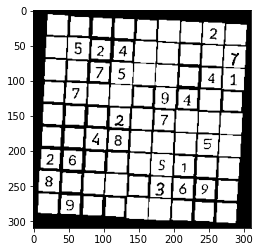

-2.9866368770599365


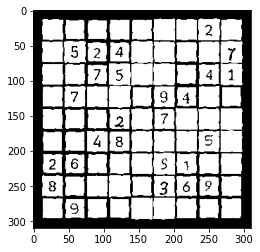

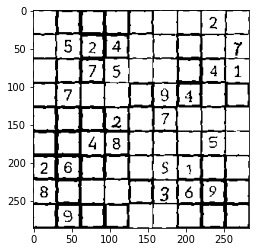

  1%|          | 54/5000 [00:32<51:45,  1.59it/s]

[4, 1, 9, 3, 7, 6, 5, 2, 8, 3, 5, 2, 4, 1, 8, 9, 6, 7, 6, 8, 7, 5, 9, 2, 3, 4, 1, 1, 7, 8, 6, 5, 9, 4, 3, 2, 5, 3, 6, 2, 4, 7, 8, 1, 9, 9, 2, 4, 8, 3, 1, 7, 5, 6, 2, 6, 3, 9, 8, 5, 1, 7, 4, 8, 4, 1, 7, 2, 3, 6, 9, 5, 7, 9, 5, 1, 6, 4, 2, 8, 3]
[4, 1, 9, 3, 7, 6, 5, 2, 8, 3, 5, 2, 4, 1, 8, 9, 6, 7, 6, 8, 7, 5, 9, 2, 3, 4, 1, 1, 7, 8, 6, 5, 9, 4, 3, 2, 5, 3, 6, 2, 4, 7, -1, 1, -1, 9, 2, 4, 8, 3, -1, -1, 5, -1, 2, 6, 3, 9, -1, 5, 1, -1, -1, 8, 4, 1, -1, 2, 3, 6, 9, -1, 7, 9, 5, 1, -1, -1, -1, -1, -1]
(310, 310)


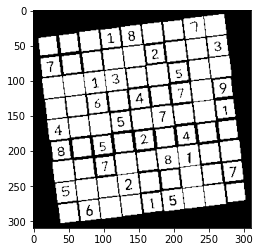

-7.001274108886719


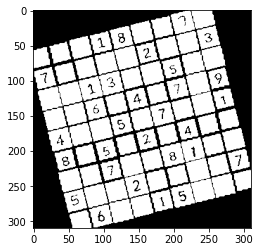

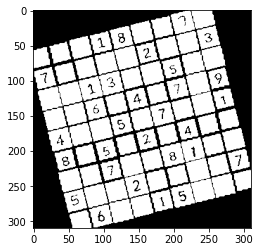

  1%|          | 55/5000 [00:32<50:43,  1.62it/s]

[3, 5, 2, 1, 8, 9, 6, 7, 4, 7, 4, 9, 6, 5, 2, 8, 1, 3, 6, 8, 1, 3, 7, 4, 5, 9, 2, 1, 2, 6, 8, 4, 3, 7, 5, 9, 4, 9, 3, 5, 6, 7, 2, 8, 1, 8, 7, 5, 9, 2, 1, 4, 3, 6, 2, 3, 7, 4, 9, 8, 1, 6, 5, 5, 1, 8, 2, 3, 6, 9, 4, 7, 9, 6, 4, 7, 1, 5, 3, 2, 8]
[3, 5, 2, 1, 8, 9, 6, 7, 4, 7, 4, 9, 6, 5, 2, 8, 1, 3, 6, 8, 1, 3, 7, 4, 5, 9, 2, 1, 2, 6, 8, 4, 3, 7, 5, 9, 4, 9, 3, 5, 6, 7, 2, 8, 1, 8, 7, 5, 9, 2, 1, 4, 3, 6, 2, 3, 7, 4, 9, 8, 1, 6, 5, 5, 1, 8, 2, 3, 6, 9, 4, 7, 9, 6, 4, 7, 1, 5, 3, 2, 8]
(310, 310)


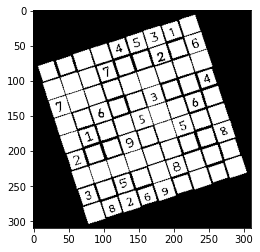

-18.019775390625


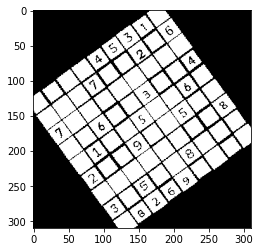

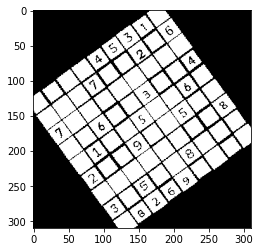

  1%|          | 56/5000 [00:33<49:59,  1.65it/s]

[6, 2, 9, 8, 4, 5, 3, 1, 7, 8, 4, 3, 7, 1, 9, 2, 5, 6, 7, 5, 1, 3, 2, 6, 4, 8, 9, 5, 7, 6, 1, 8, 3, 9, 2, 4, 9, 1, 4, 2, 5, 7, 8, 6, 3, 2, 3, 8, 9, 6, 4, 5, 7, 1, 1, 9, 7, 5, 3, 2, 6, 4, 8, 3, 6, 5, 4, 7, 8, 1, 9, 2, 4, 8, 2, 6, 9, 1, 7, 3, 5]
[6, 2, 9, 8, 4, 5, 3, 1, 7, 8, 4, 3, 7, 1, 9, 2, 5, 6, 7, 5, 1, 3, 2, 6, 4, 8, 9, 5, 7, 6, 1, 8, 3, 9, 2, 4, 9, 1, 4, 2, 5, 7, 8, 6, 3, 2, 3, 8, 9, 6, 4, 5, 7, 1, 1, 9, 7, 5, 3, 2, 6, 4, 8, 3, 6, 5, 4, 7, 8, 1, 9, 2, 4, 8, 2, 6, 9, 1, 7, 3, 5]
(310, 310)


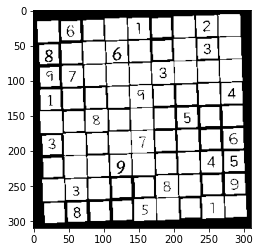

-1.9525146484375


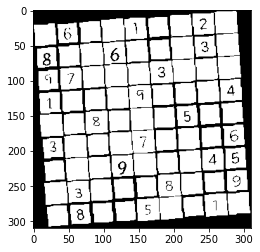

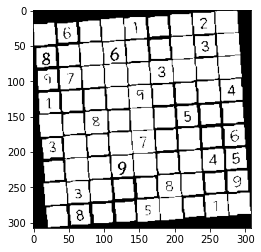

  1%|          | 57/5000 [00:33<47:58,  1.72it/s]

[5, 6, 3, 7, 1, 9, 4, 2, 8, 8, 2, 1, 6, 4, 5, 9, 3, 7, 9, 7, 4, 2, 8, 3, 6, 5, 1, 1, 5, 6, 8, 9, 2, 3, 7, 4, 7, 4, 8, 3, 6, 1, 5, 9, 2, 3, 9, 2, 5, 7, 4, 1, 8, 6, 2, 1, 7, 9, 3, 6, 8, 4, 5, 4, 3, 5, 1, 2, 8, 7, 6, 9, 6, 8, 9, 4, 5, 7, 2, 1, 3]
[5, 6, 3, 7, 1, 9, 4, 2, 8, 8, 2, 1, 6, 4, 5, 9, 3, 7, 9, 7, 4, 2, 8, 3, 6, 5, 1, 1, 5, 6, 8, 9, 2, 3, 7, 4, 7, 4, 8, 3, -1, 1, 5, 9, 2, 3, 9, 2, 5, 7, 4, 1, 8, 6, 2, 1, 7, 9, 3, 6, 8, 4, 5, 4, 3, 5, 1, 2, 8, 7, 6, 9, 6, 8, 9, 4, 5, 7, 2, 1, 3]
(310, 310)


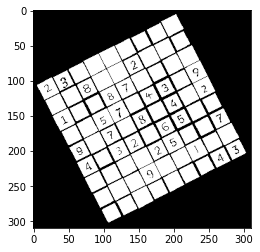

-27.012664794921875


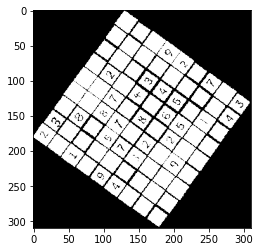

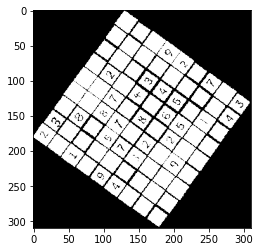

  1%|          | 58/5000 [00:34<46:34,  1.77it/s]

[2, 3, 9, 6, 5, 1, 7, 8, 4, 6, 7, 8, 3, 4, 2, 9, 5, 1, 1, 5, 4, 8, 7, 9, 2, 3, 6, 8, 2, 5, 7, 1, 4, 3, 6, 9, 9, 6, 7, 5, 8, 3, 4, 1, 2, 4, 1, 3, 2, 9, 6, 5, 7, 8, 3, 8, 1, 4, 2, 5, 6, 9, 7, 7, 4, 6, 9, 3, 8, 1, 2, 5, 5, 9, 2, 1, 6, 7, 8, 4, 3]
[2, 3, 9, 6, 5, 1, 7, 8, 4, 6, 7, 8, 3, 4, 2, 9, 5, 1, 1, 5, 4, 8, 7, 9, 2, 3, 6, 8, 2, 5, 7, 1, 4, 3, 6, 9, 9, 6, 7, 5, 8, 3, 4, 1, 2, 4, 1, 3, 2, 9, 6, 5, 7, 8, 3, 8, 1, 4, 2, 5, 6, 9, 7, 7, 4, 6, 9, 3, 8, 1, 2, 5, 5, 9, 2, 1, 6, 7, 8, 4, 3]
(310, 310)


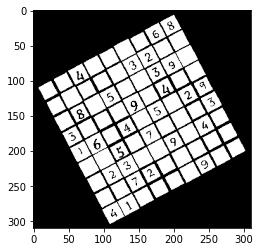

-27.699474334716797


In [ ]:
X = []
y = []
shapes = []
training_labels_df = pd.read_csv("train/labels.csv")
count = 0
img_sample = np.zeros([300,300])

for _idx, row in tqdm.tqdm(training_labels_df.iterrows(), total=training_labels_df.shape[0]):
    filepath = os.path.join(
        "train/images",
        f"{row.id:04d}.png"
    )
    count = count + 1
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img1 = trans(img)
    print(list(map(int, row.solution)))
    labels = list(map(int, row.solution))
    data_x,data_y = step(img1,labels)
    print(data_y)
    
    if count == 100:
        break
    shapes.append(img1.shape)
    X.extend(data_x)
    y.extend(data_y)

X = np.array(X)
y = np.array(y)

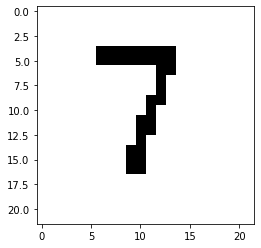

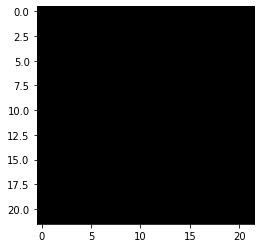

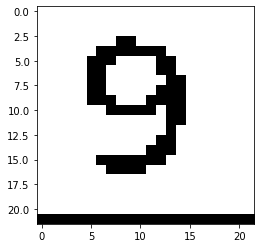

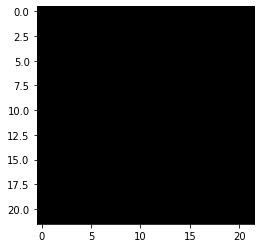

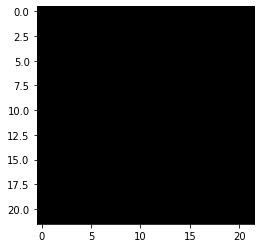

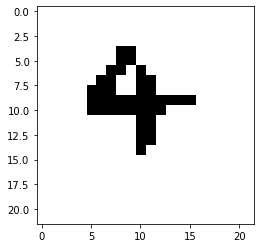

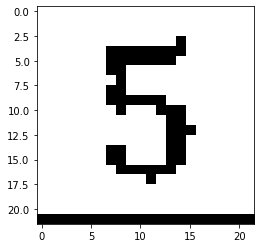

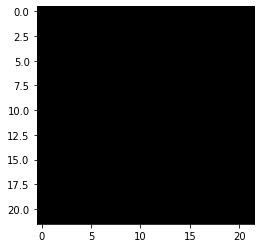

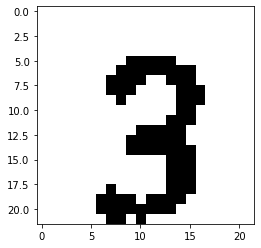

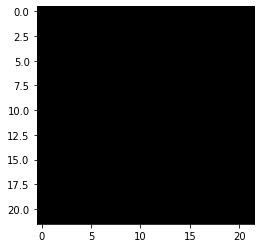

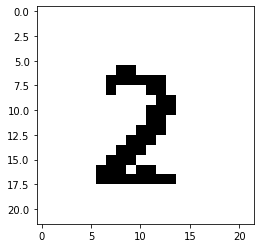

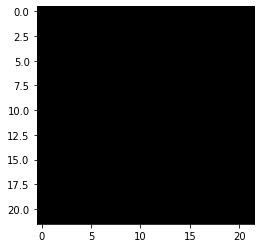

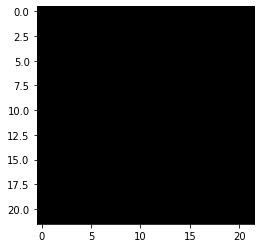

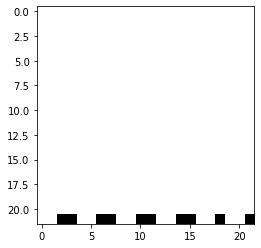

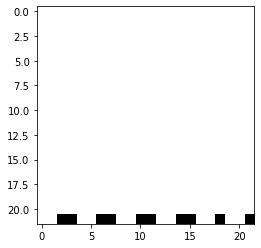

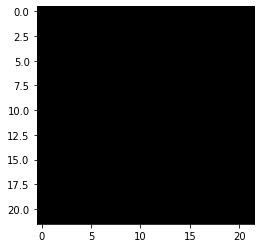

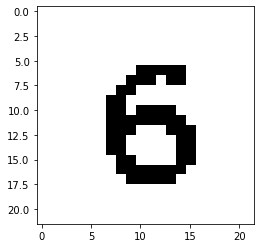

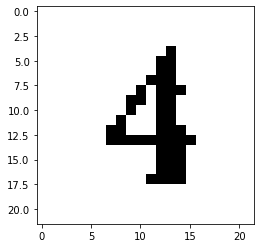

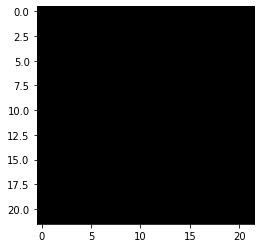

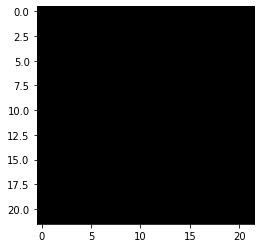

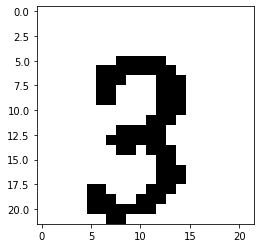

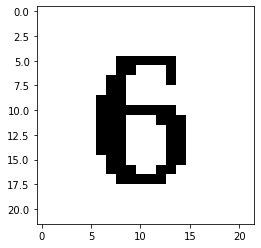

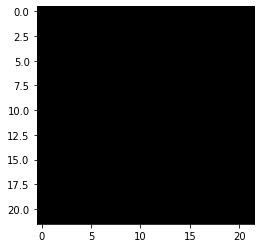

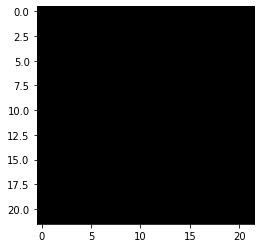

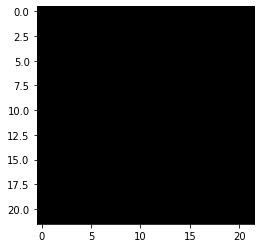

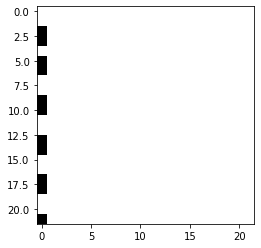

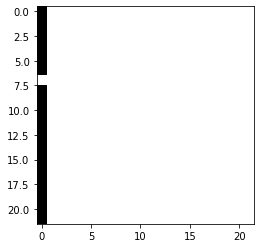

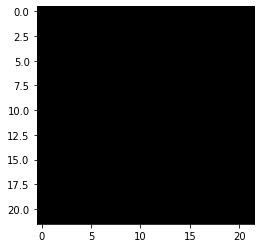

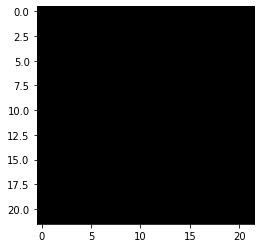

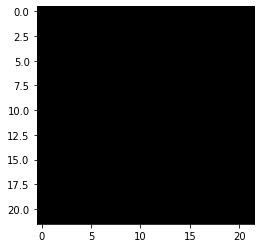

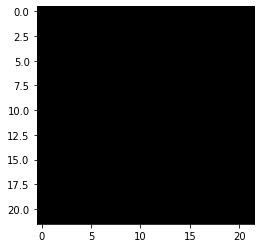

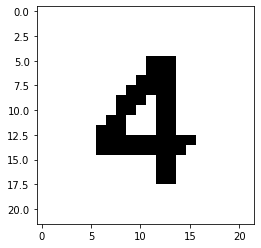

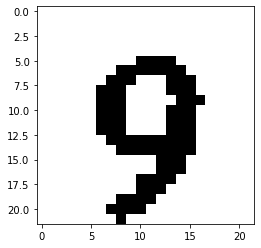

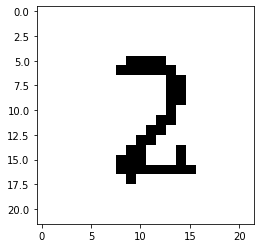

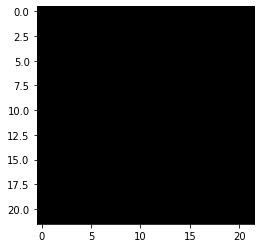

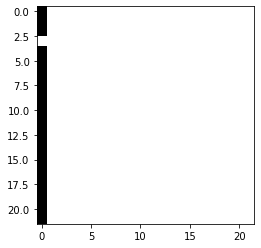

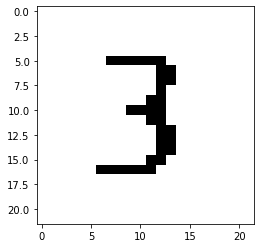

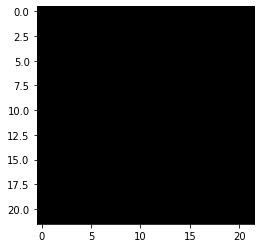

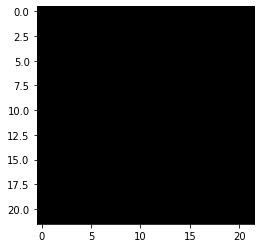

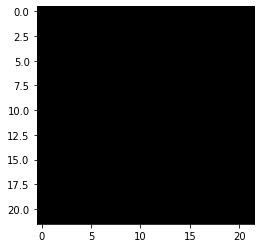

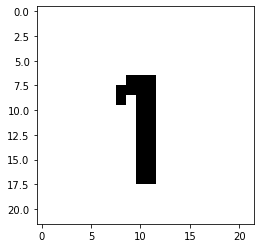

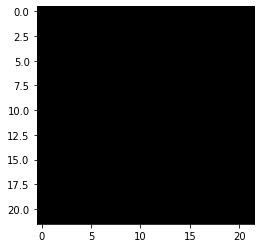

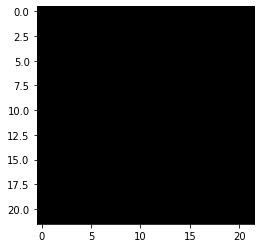

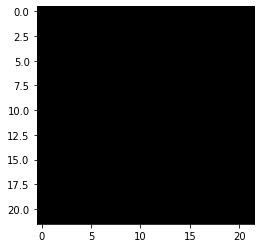

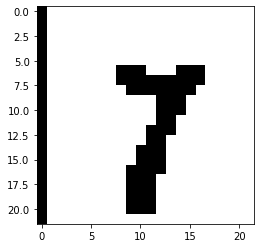

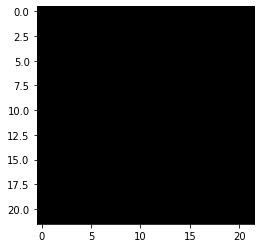

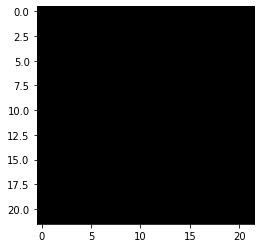

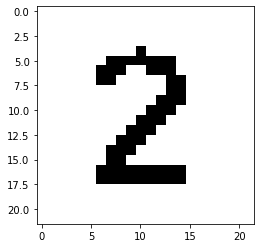

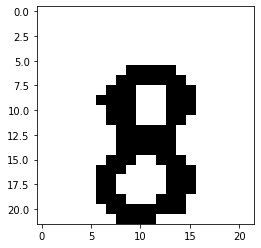

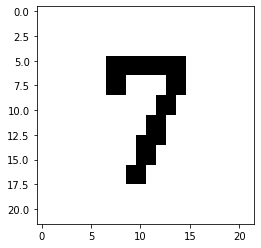

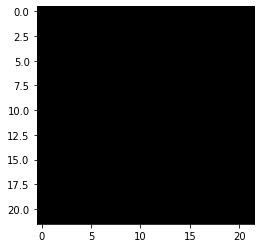

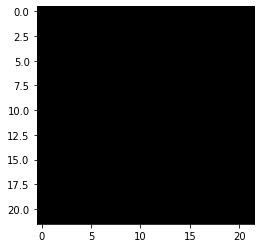

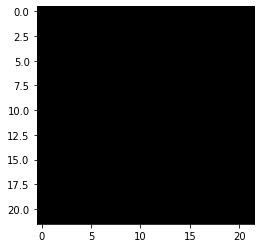

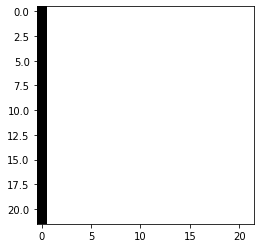

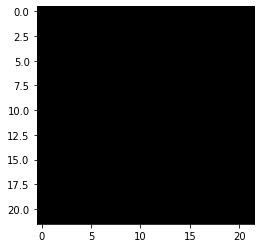

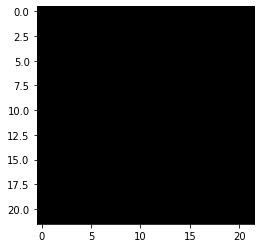

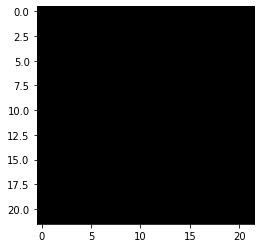

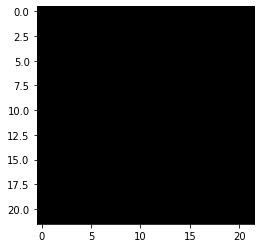

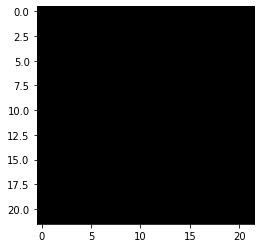

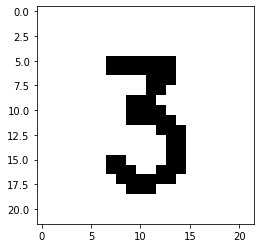

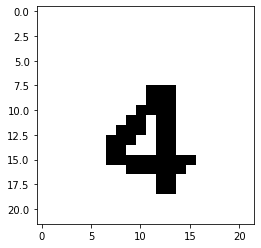

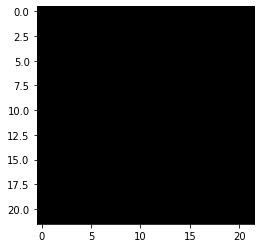

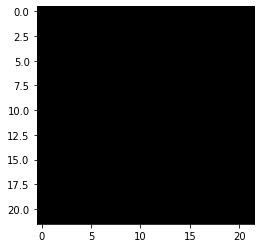

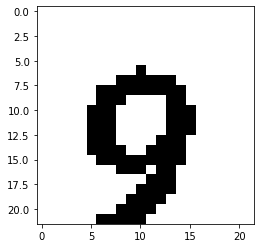

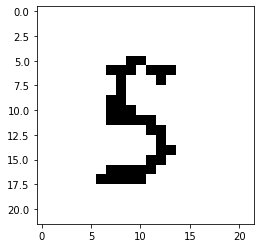

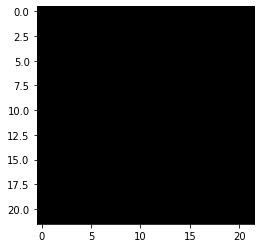

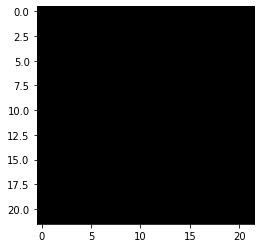

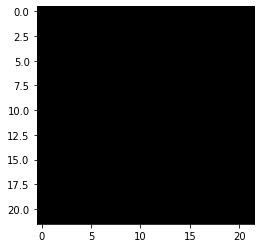

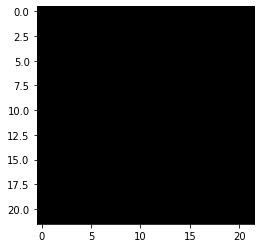

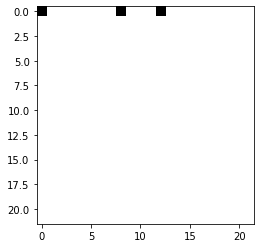

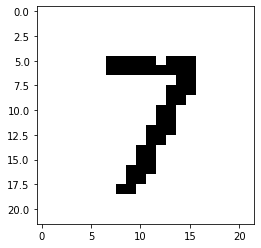

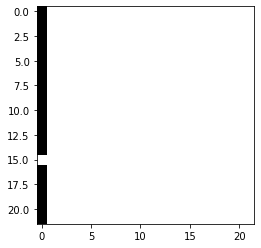

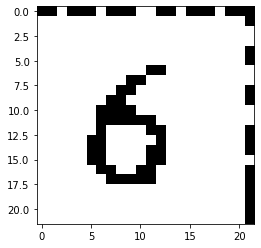

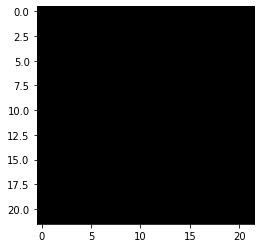

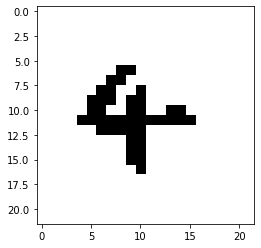

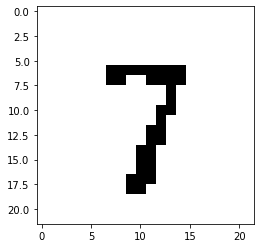

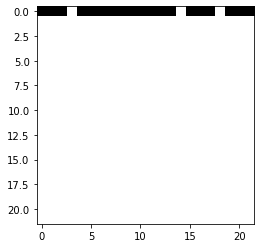

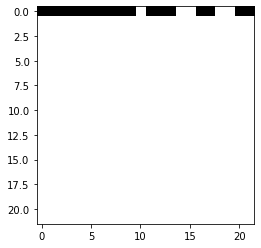

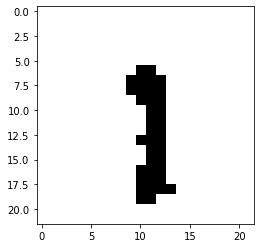

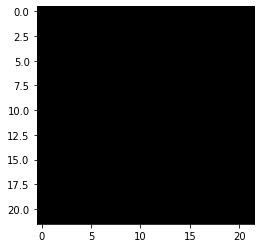

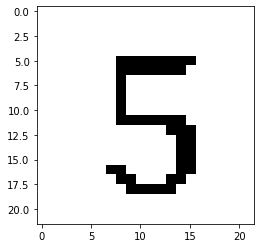

In [6]:
for i in range (len(data_x)):
    
    plt.imshow(data_x[i],cmap='Greys_r')
    plt.show()

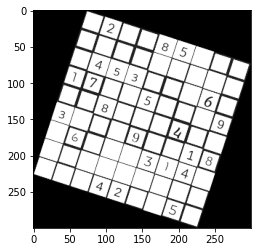

In [9]:
plt.imshow(img_sample,cmap='Greys_r')

check 7th image